<a href="https://colab.research.google.com/github/casjunior93/Projeto-Tera-IA---Previsao-de-obitos-por-covid-considerando-doencas-pre-existentes/blob/main/Covid_e_doen%C3%A7as_pr%C3%A9_existentes_em_SP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Habilitando o acesso ao Google Drive no Colab.

In [160]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Versão mais nova do matplotlib

In [ ]:
!pip install -U matplotlib --prefer-binary
import matplotlib
matplotlib.__version__

# Bibliotecas fundamentais

In [161]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import os 
import missingno as msno

#Não exibir avisos de atenção
import warnings
warnings.filterwarnings('ignore')

#Configura o pandas para não exibir resultados em notação científica
pd.options.display.float_format = '{:.5f}'.format

# Roteiro do Projeto

O livro [Mãos à Obra: Aprendizado de Máquina com Scikit-Learn, Keras & TensorFlow](https://www.oreilly.com/library/view/maos-a-obra/9788550803814/) traz uma sugestão de roteiro para orientar um projeto de aprendizado de máquina. Os passos gerais são:

1.   Abordar o problema e analisar o panorama em geral
2.   Obter os dados
3.   Explorar os dados para obter informações úteis
4.   Preparar os dados para expor melhor os padrões de dados subjacentes aos algoritmos de aprendizado de máquina.
5.   Explorar modelos diferentes e selecionar os melhores.
6.   Aperfeiçoar os modelos e os combinar em uma solução ideal.
7.   Apresentar a solução.
8.   Implementar, monitorar e fazer a manutenção de seu sistema.



# 1 Abordar o problema e analisar o panorama em geral

A COVID-19 é uma doença causada pelo coronavírus SARS-CoV-2. Seus principais sintomas são febre, cansaço e tosse seca. [(1)](https://www.paho.org/pt/covid19) O crescimento rápido de casos e óbitos por COVID-19 causou uma grande sobrecarga do sistema de saúde no Brasil. [(2)](http://cadernos.ensp.fiocruz.br/csp/artigo/1451/mortalidade-por-covid-19-padronizada-por-idade-nas-capitais-das-diferentes-regioes-do-brasil) Várias cidades brasileiras sofreram com a falta de leitos de UTI para casos graves de COVID-19, o que trouxe um dado alarmante: em 2021, 38% das mortes por covid ocorreram por falta de atendimento médico. [(3)](https://oglobo.globo.com/brasil/em-2021-38-dos-mortos-por-covid-em-hospitais-nao-chegaram-uti-1-24944189)

O objetivo desse modelo é prever se uma pessoa pode vir a óbito por covid-19 levando em consideração as doenças pré-existentes desta. Este modelo poderia ser útil para fazer a triagem de pacientes e o gerenciamento de leitos. Além disso, pode ser uma boa ferramenta para a prevenção de casos graves de COVID-19, gerando recomendações de vacinação, por exemplo, tendo em vista as diversas variantes do vírus que estão aparecendo e ao relaxamento das medidas de isolamento.

# 2 Obter os dados

Os dados utilizados são referentes à população do estado de São Paulo e serão obtidos através da página [do site](https://www.seade.gov.br/coronavirus/) da Fundação SEADE - Sistema Estadual de Análise de Dados. Eles foram obtidos no dia 20 de julho de 2022 e apresentam dados recolhidos de 04 de fevereiro de 2020 até o dia 18 de julho de 2022.

Dicionário: https://github.com/seade-R/dados-covid-sp#dicion%C3%A1rio-para-o-arquivo-de-casos-%C3%B3bitos-e-doen%C3%A7as-pr%C3%A9-existentes

Dados: https://raw.githubusercontent.com/seade-R/dados-covid-sp/master/data/casos_obitos_doencas_preexistentes.csv.zip

## 2.1 Dicionário

`codigo_ibge`	Código do município no IBGE (7 dígitos) de residência do paciente

`nome_munic`	Nome do município de residência do paciente

`idade`	Idade do paciente

`cs_sexo`	Sexo do paciente

`diagnostico_covid19`	Confirmação de COVID-19

`data_inicio_sintomas`	Data de início dos sintomas

`obito`	Indica se o paciente veio a óbito por COVID-19

`asma`	Paciente apresenta esse fator de risco (asma)

`cardiopatia`	Paciente apresenta esse fator de risco (cardiopatia)

`diabetes`	Paciente apresenta esse fator de risco (diabetes)

`doenca_hematologica`	Paciente apresenta esse fator de risco (doença hematológica)

`doenca_hepatica`	Paciente apresenta esse fator de risco (doença hepática)

`doenca_neurologica`	Paciente apresenta esse fator de risco (doença neurológica)

`doenca_renal`	Paciente apresenta esse fator de risco (doença renal)

`imunodepressao`	Paciente apresenta esse fator de risco (imunodepressão)

`obesidade`	Paciente apresenta esse fator de risco (obesidade)

`outros_fatores_de_risco`	Paciente apresenta outros fatores de risco

`pneumopatia`	Paciente apresenta esse fator de risco (pneumopatia)

`puerpera`	Paciente se encontra nesse estágio (puérpera)

`sindrome_de_down`	Paciente apresenta esse fator de risco (síndrome de down)

## 2.2 Importação dos dados

In [4]:
%%time
df_completo = pd.read_csv('/content/drive/MyDrive/ANÁLISES DE DADOS/Covid/casos_obitos_doencas_preexistentes.csv',
                          sep=';', encoding='utf-8', parse_dates=['data_inicio_sintomas'])

CPU times: user 38.7 s, sys: 3.27 s, total: 42 s
Wall time: 50 s


In [5]:
df_completo.head(5)

,nome_munic,codigo_ibge,idade,cs_sexo,diagnostico_covid19,data_inicio_sintomas,obito,asma,cardiopatia,diabetes,doenca_hematologica,doenca_hepatica,doenca_neurologica,doenca_renal,imunodepressao,obesidade,outros_fatores_de_risco,pneumopatia,puerpera,sindrome_de_down
0,Santa Cruz do Rio Pardo,3546405,42.00000,MASCULINO,CONFIRMADO,2022-01-23 00:00:00+00:00,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
1,Santa Cruz do Rio Pardo,3546405,26.00000,FEMININO,CONFIRMADO,2022-01-24 00:00:00+00:00,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
2,Santa Cruz do Rio Pardo,3546405,51.00000,MASCULINO,CONFIRMADO,2022-01-24 00:00:00+00:00,0,IGNORADO,SIM,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
3,Santa Cruz do Rio Pardo,3546405,57.00000,MASCULINO,CONFIRMADO,2022-01-24 00:00:00+00:00,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
4,Santa Cruz do Rio Pardo,3546405,25.00000,MASCULINO,CONFIRMADO,2022-01-24 00:00:00+00:00,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO


In [6]:
df_completo.shape

(5852960, 20)

Os registros com valores 'IGNORADO' correspondem a dados que não foram informados.

Dataframe sem os dados com os campos com valor 'IGNORADO':

In [7]:
%%time
colunas = df_completo.columns
df_sem_ignorados = df_completo.copy()

for c in colunas:
  df_sem_ignorados.drop(df_sem_ignorados.loc[df_sem_ignorados[c]=='IGNORADO'].index, inplace=True)

df_sem_ignorados.shape


CPU times: user 15.9 s, sys: 1.38 s, total: 17.2 s
Wall time: 17.2 s


Salvando registros sem ignorados em csv:

In [8]:
%%time
os.makedirs('/content/drive/MyDrive/ANÁLISES DE DADOS/Covid', exist_ok=True)  
df_sem_ignorados.to_csv('/content/drive/MyDrive/ANÁLISES DE DADOS/Covid/casos_obitos_doencas_preexistentes_sem_ignorados.csv') 

CPU times: user 2.28 s, sys: 39.2 ms, total: 2.32 s
Wall time: 2.5 s


In [9]:
df_sem_ignorados.head()

,nome_munic,codigo_ibge,idade,cs_sexo,diagnostico_covid19,data_inicio_sintomas,obito,asma,cardiopatia,diabetes,doenca_hematologica,doenca_hepatica,doenca_neurologica,doenca_renal,imunodepressao,obesidade,outros_fatores_de_risco,pneumopatia,puerpera,sindrome_de_down
7,Santa Cruz do Rio Pardo,3546405,68.00000,FEMININO,CONFIRMADO,2022-01-24 00:00:00+00:00,0,NÃO,SIM,SIM,NÃO,NÃO,NÃO,SIM,NÃO,NÃO,SIM,NÃO,NÃO,NÃO
28,Santa Cruz do Rio Pardo,3546405,77.00000,FEMININO,CONFIRMADO,2022-01-18 00:00:00+00:00,1,NÃO,SIM,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO
31,Santa Bárbara d'Oeste,3545803,22.00000,MASCULINO,CONFIRMADO,2020-10-22 00:00:00+00:00,0,NÃO,SIM,SIM,NÃO,NÃO,SIM,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO
91,Santa Cruz do Rio Pardo,3546405,71.00000,MASCULINO,CONFIRMADO,2022-01-24 00:00:00+00:00,0,NÃO,SIM,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,SIM,NÃO,NÃO
93,Santa Cruz do Rio Pardo,3546405,102.00000,MASCULINO,CONFIRMADO,2022-01-24 00:00:00+00:00,1,NÃO,SIM,SIM,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO


In [10]:
print(f'O conjunto de dados sem ignorados tem {df_sem_ignorados.shape[0]} registros.')

O conjunto de dados sem ignorados tem 185800 registros.


# 3 Explorar os dados para obter informações úteis

In [11]:
#df = pd.read_csv('/content/drive/MyDrive/ANÁLISES DE DADOS/Covid/casos_obitos_doencas_preexistentes_sem_ignorados.csv', sep=',')
#df = pd.read_csv('/content/drive/MyDrive/ANÁLISES DE DADOS/Covid/casos_obitos_doencas_preexistentes.csv', sep=',')
df = df_completo

## 3.1 Análise descritiva

Achamos interessante analisar primeiramente o período anterior ao início da vacinação no Estada de São Paulo, que começou em 17 de janeiro de 2021 com a vacinação da enfermeira Mônica Calazans. [(4)](https://vejasp.abril.com.br/saude/ato-simbolico-de-doria-marca-inicio-da-vacinacao-em-sao-paulo/)

Obtendo dados anteriores à 17 de janeiro de 2021.

In [12]:
%%time
df = df.loc[df['data_inicio_sintomas'] < '2021-01-17']

CPU times: user 332 ms, sys: 3.08 ms, total: 335 ms
Wall time: 340 ms


In [13]:
min_data = df.loc[df['data_inicio_sintomas'] < '2021-01-17']['data_inicio_sintomas'].min()
max_data = df.loc[df['data_inicio_sintomas'] < '2021-01-17']['data_inicio_sintomas'].max()

In [14]:
print(f'Novo tamanho do dataframe: {df.shape[0]}')
print(f'Data mínima: {min_data}')
print(f'Data mínima: {max_data}')

Novo tamanho do dataframe: 1844188
Data mínima: 2020-02-04 00:00:00+00:00
Data mínima: 2021-01-16 00:00:00+00:00


In [15]:
%%time
df.describe(include='all')

CPU times: user 3.88 s, sys: 27 ms, total: 3.9 s
Wall time: 3.89 s


,nome_munic,codigo_ibge,idade,cs_sexo,diagnostico_covid19,data_inicio_sintomas,obito,asma,cardiopatia,diabetes,doenca_hematologica,doenca_hepatica,doenca_neurologica,doenca_renal,imunodepressao,obesidade,outros_fatores_de_risco,pneumopatia,puerpera,sindrome_de_down
count,1844188,1844188.00000,1843023.00000,1844188,1844188,1844188,1844188.00000,1844188,1844188,1844188,1844188,1844188,1844188,1844188,1844188,1844188,1844188,1844188,1844188,1844188
unique,646,NaN,NaN,4,1,348,NaN,3,3,3,3,3,3,3,3,3,3,3,3,3
top,São Paulo,NaN,NaN,FEMININO,CONFIRMADO,2021-01-04 00:00:00+00:00,NaN,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
freq,498959,NaN,NaN,994117,1844188,17636,NaN,1756856,1635133,1679126,1758235,1758544,1755748,1752060,1747838,1756630,1741887,1756030,1759364,1758586
first,NaN,NaN,NaN,NaN,NaN,2020-02-04 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,2021-01-16 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,3535903.37141,41.62564,NaN,NaN,NaN,0.03221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,17025.65991,17.42508,NaN,NaN,NaN,0.17657,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,3500105.00000,0.00000,NaN,NaN,NaN,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,3520400.00000,29.00000,NaN,NaN,NaN,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Informações obtidas através do método describe():

* O conjunto tem 1844188 regitros.
* Houve mais casos de COVID-19 confirmados na cidade de São Paulo.
* As mulheres são a maioria dos casos.
* A média de óbitos dá uma indicação de que a maioria das pessoas da amostra não morreram.

Vou verificar a idade máxima de 136 anos. Com certeza é um erro.

In [16]:
df.shape

(1844188, 20)

In [17]:
df.loc[df['idade'] == 136]

,nome_munic,codigo_ibge,idade,cs_sexo,diagnostico_covid19,data_inicio_sintomas,obito,asma,cardiopatia,diabetes,doenca_hematologica,doenca_hepatica,doenca_neurologica,doenca_renal,imunodepressao,obesidade,outros_fatores_de_risco,pneumopatia,puerpera,sindrome_de_down
3722824,Taubaté,3554102,136.00000,MASCULINO,CONFIRMADO,2020-03-19 00:00:00+00:00,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO


Vou excluir esse dado.

In [18]:
indexes = df[ df['idade'] == 136 ].index
df.drop(indexes , inplace=True)

In [19]:
df.shape

(1844187, 20)

## 3.2 Tipo dos dados

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1844187 entries, 13 to 5852907
Data columns (total 20 columns):
 #   Column                   Dtype              
---  ------                   -----              
 0   nome_munic               object             
 1   codigo_ibge              int64              
 2   idade                    float64            
 3   cs_sexo                  object             
 4   diagnostico_covid19      object             
 5   data_inicio_sintomas     datetime64[ns, UTC]
 6   obito                    int64              
 7   asma                     object             
 8   cardiopatia              object             
 9   diabetes                 object             
 10  doenca_hematologica      object             
 11  doenca_hepatica          object             
 12  doenca_neurologica       object             
 13  doenca_renal             object             
 14  imunodepressao           object             
 15  obesidade                object

## 3.3 Dados Nulos

CPU times: user 1.65 s, sys: 109 ms, total: 1.76 s
Wall time: 1.66 s


<AxesSubplot:>

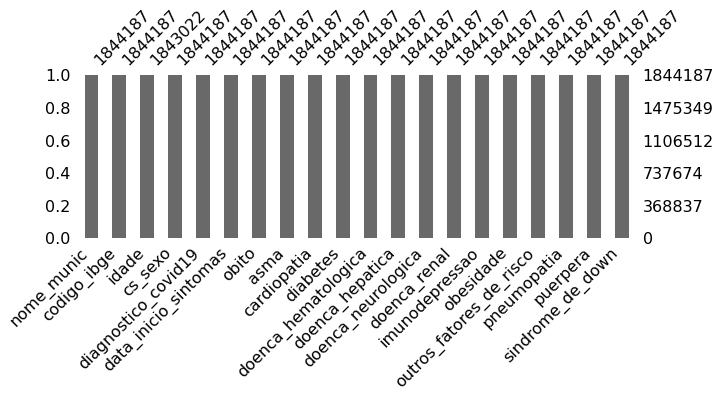

In [21]:
%%time
msno.bar(df, figsize=(10, 3))

In [22]:
df.isnull().sum()

nome_munic                    0
codigo_ibge                   0
idade                      1165
cs_sexo                       0
diagnostico_covid19           0
data_inicio_sintomas          0
obito                         0
asma                          0
cardiopatia                   0
diabetes                      0
doenca_hematologica           0
doenca_hepatica               0
doenca_neurologica            0
doenca_renal                  0
imunodepressao                0
obesidade                     0
outros_fatores_de_risco       0
pneumopatia                   0
puerpera                      0
sindrome_de_down              0
dtype: int64

Verificamos que há dados de idades faltantes. Verificando se podemos excluir esses dados:

In [23]:
total_nulos = df['idade'].isnull().sum()
total_registros = df.shape[0]
porcentagem = (total_nulos/total_registros) * 100
print(f'{porcentagem}%')

0.06317146796935452%


Como os dados nulos representam apenas 0.063%, vou excluí-los.

In [24]:
df.shape

(1844187, 20)

In [25]:
df.dropna(inplace=True)

In [26]:
df.shape

(1843022, 20)

## 3.4 Idade

### 3.4.1 Visualização da feature idade

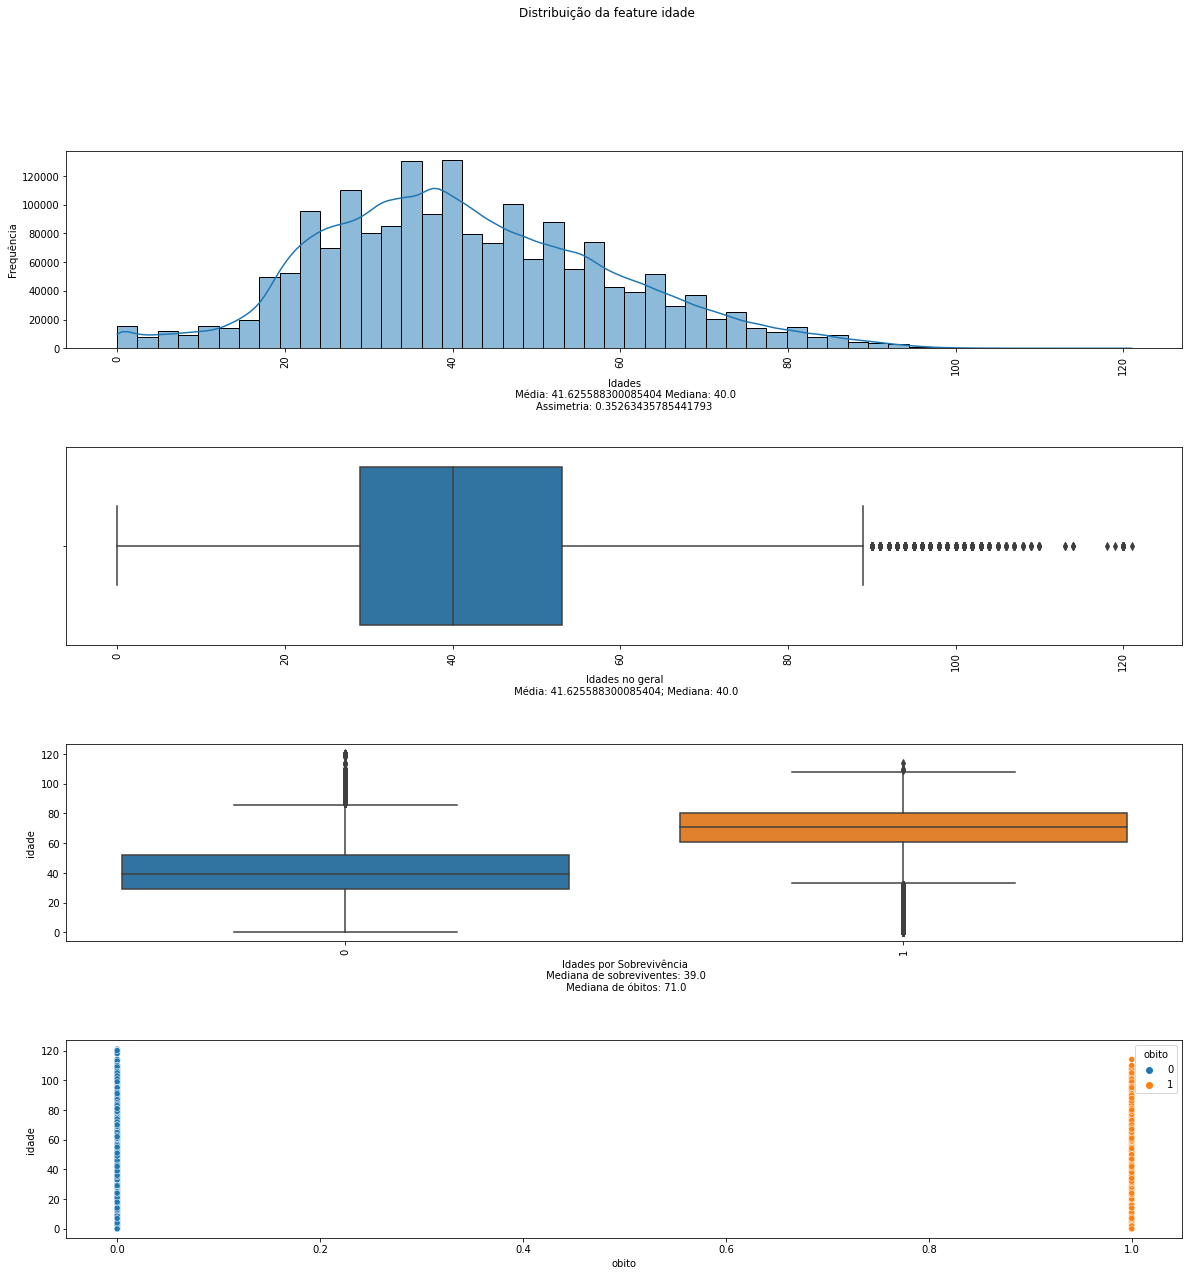

CPU times: user 59.8 s, sys: 4.51 s, total: 1min 4s
Wall time: 1min 1s


In [27]:
%%time

fig, axes = plt.subplots(4, 1, figsize = (20,20))
fig.subplots_adjust(hspace=0.5, wspace=0.125)
fig.suptitle('Distribuição da feature idade')

#Idade
sns.histplot(ax=axes[0],x=df['idade'], kde=True, bins=50)
axes[0].tick_params(axis='x', rotation=90)
axes[0].set(xlabel='Idades\n Média: ' + str(df['idade'].mean()) + ' Mediana: ' + str(df['idade'].median()) + '\nAssimetria: ' + str(df.idade.skew()), ylabel='Frequência')

#Idade - Boxplot
sns.boxplot(ax=axes[1],x=df['idade'])
axes[1].tick_params(axis='x', rotation=90)
axes[1].set(xlabel='Idades no geral\n Média: ' + str(df['idade'].mean()) + '; Mediana: ' + str(df['idade'].median()))

#Idade - Boxplot
sns.boxplot(ax=axes[2],x=df['obito'], y=df['idade'])
axes[2].tick_params(axis='x', rotation=90)
axes[2].set(xlabel='Idades por Sobrevivência\n Mediana de sobreviventes: ' + str(df.loc[df['obito'] == 0]['idade'].median()) + '\n Mediana de óbitos: ' + str(df.loc[df['obito'] == 1]['idade'].median()))

#Idade vs Óbito
sns.scatterplot(ax=axes[3], data=df, x="obito", y="idade", hue="obito")

plt.show();

* Há outliers acima de 90 anos muito estranhos.

Como há outliers acima de 90 anos, vou verificar se posso considerar somente dados abaixo ou igual à 90 anos.

In [28]:
total_casos_maior_90 = df[ df['idade'] > 90].shape[0]
total_registros = df.shape[0]
porcentagem = (total_casos_maior_90/total_registros) * 100
print(f'{porcentagem}%')

0.38143874571220526%


Como representam apenas 0.38% dos dados, vou excluir registros com mais de 90 anos.

In [29]:
df.shape

(1843022, 20)

In [30]:
indexes2 = df[ df['idade'] > 90].index
df.drop(indexes2 , inplace=True)

In [31]:
df.shape

(1835992, 20)

Refazendo os gráficos:

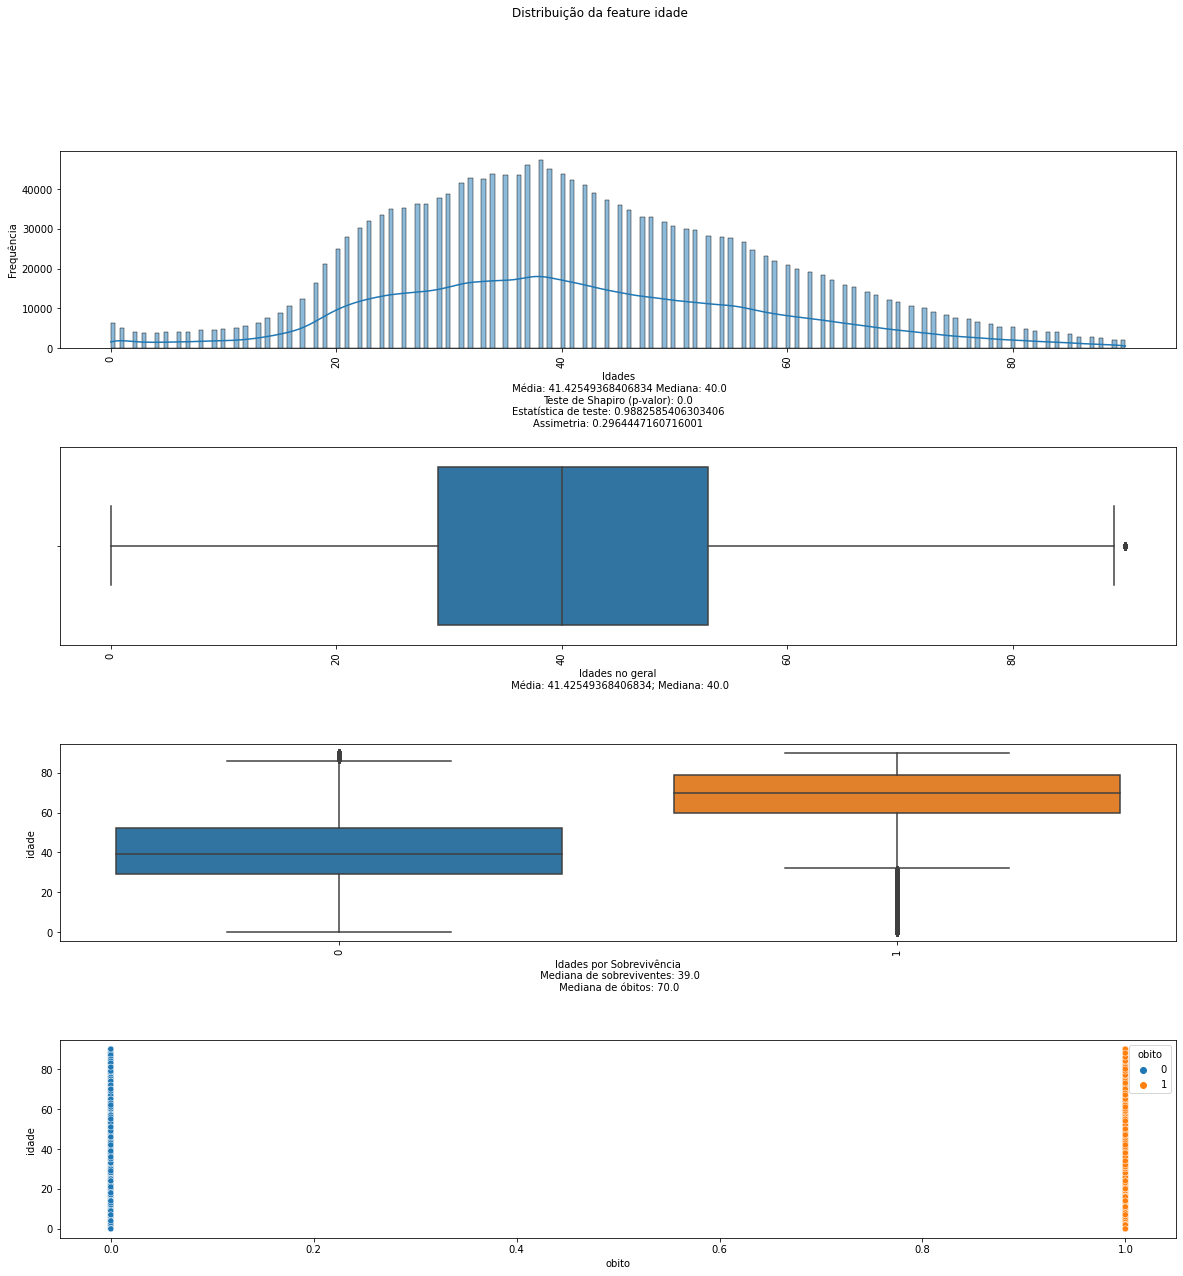

CPU times: user 58.5 s, sys: 4.51 s, total: 1min 2s
Wall time: 1min


In [32]:
%%time
stat1,p1 = stats.shapiro(df['idade'].to_numpy())

fig, axes = plt.subplots(4, 1, figsize = (20,20))
fig.subplots_adjust(hspace=0.5, wspace=0.125)
fig.suptitle('Distribuição da feature idade')

#Idade
sns.histplot(ax=axes[0],x=df['idade'], kde=True)
axes[0].tick_params(axis='x', rotation=90)
axes[0].set(xlabel='Idades\n Média: ' + str(df['idade'].mean()) + ' Mediana: ' + str(df['idade'].median()) + '\nTeste de Shapiro (p-valor): ' 
            + str(p1) + '\nEstatística de teste: ' + str(stat1) + '\nAssimetria: ' + str(df.idade.skew()), ylabel='Frequência')

#Idade - Boxplot
sns.boxplot(ax=axes[1],x=df['idade'])
axes[1].tick_params(axis='x', rotation=90)
axes[1].set(xlabel='Idades no geral\n Média: ' + str(df['idade'].mean()) + '; Mediana: ' + str(df['idade'].median()))

#Idade - Boxplot
sns.boxplot(ax=axes[2],x=df['obito'], y=df['idade'])
axes[2].tick_params(axis='x', rotation=90)
axes[2].set(xlabel='Idades por Sobrevivência\n Mediana de sobreviventes: ' + str(df.loc[df['obito'] == 0]['idade'].median()) + '\n Mediana de óbitos: ' + str(df.loc[df['obito'] == 1]['idade'].median()))

#Idade vs Óbito
sns.scatterplot(ax=axes[3], data=df, x="obito", y="idade", hue="obito")

plt.show();

* A média das idades no geral é de aproximadamente 41 anos e a mediana é 40.
* O teste de Shapiro-Wilk indica que a distribuição não é normal, pois p-value < 0.5.
* A assimetria positiva indica que existe uma concentração levemente maior de valores na zona de idades mais baixas da amostra.
* Os boxplots indicam que o grupo de sobreviventes tem mediana de 39 anos, e o grupo de óbitos tem mediana de 70 anos, o que indica mortalidade maior em pessoas com maior idade.
* A dispersão dos dados indicam que os dados tem pouca variabilidade, tanto no grupos de sobreviventes quanto no de óbitos.

### 3.4.2 Teste de hipótese sobre a relação de idade e óbito

Como visto anteriormente, a feature idade não tem distribuição normal.

In [33]:
stat2,p2 = stats.shapiro(df['idade'].to_numpy())

In [34]:
print(f'Estatística de teste: {stat2}')
print(f'P-value: {p2}')

Estatística de teste: 0.9882585406303406
P-value: 0.0


Por isso, vou tentar normalizar utilizando logarítmo.

In [35]:
def aplica_log(df):
  '''Aplica logarítmo no dado'''
  if df['idade'] == 0:
    return 0
  if df['idade'] > 0:
    return np.log(df['idade'])

In [36]:
%%time
df['log_idade'] = df.apply(aplica_log, axis=1)

CPU times: user 39.7 s, sys: 402 ms, total: 40.1 s
Wall time: 40.3 s


CPU times: user 296 ms, sys: 11.8 ms, total: 308 ms
Wall time: 292 ms


<AxesSubplot:ylabel='Frequency'>

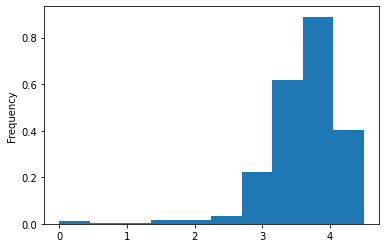

In [37]:
%%time
df['log_idade'].plot.hist(density=True)

Testando a normalidade novamente:

In [38]:
stat3, p3 = stats.shapiro(df['log_idade'])
print('O valor da estatística de Shapiro-Wilk = ' + str(stat3))
print('O valor de p de Shapiro-Wilk = ' + str(p3))

O valor da estatística de Shapiro-Wilk = 0.821019172668457
O valor de p de Shapiro-Wilk = 0.0


Continua não sendo normal. Vamos testar a raiz quadrada:

In [39]:
def aplica_rq(df):
  '''Aplica raiz quadrada no dado'''
  return np.sqrt(df['idade'])

In [40]:
%%time
df['sqrt_idade'] = df.apply(aplica_rq, axis=1)

CPU times: user 29.2 s, sys: 398 ms, total: 29.6 s
Wall time: 29.8 s


CPU times: user 293 ms, sys: 11.9 ms, total: 305 ms
Wall time: 297 ms


<AxesSubplot:ylabel='Frequency'>

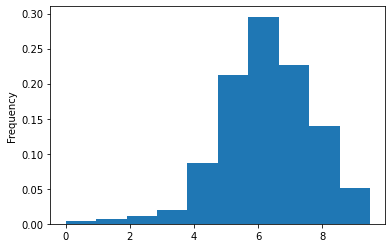

In [41]:
%%time
df['sqrt_idade'].plot.hist(density=True)

Testando a normalidade:

In [42]:
stat4, p4 = stats.shapiro(df['sqrt_idade'])
print('O valor da estatística de Shapiro-Wilk = ' + str(stat4))
print('O valor de p de Shapiro-Wilk = ' + str(p4))

O valor da estatística de Shapiro-Wilk = 0.9791151881217957
O valor de p de Shapiro-Wilk = 0.0


Ainda não, testando com raiz cúbica:

In [43]:
def aplica_rc(df):
  '''Aplica raiz quadrada no dado'''
  return np.cbrt(df['idade'])

In [44]:
%%time
df['cbrt_idade'] = df.apply(aplica_rc, axis=1)

CPU times: user 27.4 s, sys: 423 ms, total: 27.8 s
Wall time: 27.9 s


CPU times: user 291 ms, sys: 12 ms, total: 303 ms
Wall time: 295 ms


<AxesSubplot:ylabel='Frequency'>

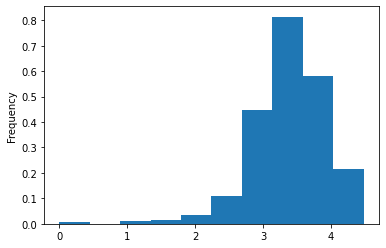

In [45]:
%%time
df['cbrt_idade'].plot.hist(density=True)

Testando a normalidade:

In [46]:
stat5, p5 = stats.shapiro(df['cbrt_idade'])
print('O valor da estatística de Shapiro-Wilk = ' + str(stat5))
print('O valor de p de Shapiro-Wilk = ' + str(p5))

O valor da estatística de Shapiro-Wilk = 0.9305524826049805
O valor de p de Shapiro-Wilk = 0.0


Não conseguimos obter uma curva próxima da normal. Uma indicação, como vimos [aqui](https://support.minitab.com/pt-br/minitab/19/help-and-how-to/statistics/basic-statistics/supporting-topics/normality/what-to-do-with-nonnormal-data/), é aplicar o Teste U de Mann-Whitney. Este [artigo](https://www.marsja.se/how-to-perform-mann-whitney-u-test-in-python-with-scipy-and-pingouin/) explica como executar este teste.

Dividindo o conjunto em dois grupos, um de sobreviventes e outro de óbitos.

In [47]:
df.head(1)

,nome_munic,codigo_ibge,idade,cs_sexo,diagnostico_covid19,data_inicio_sintomas,obito,asma,cardiopatia,diabetes,...,doenca_renal,imunodepressao,obesidade,outros_fatores_de_risco,pneumopatia,puerpera,sindrome_de_down,log_idade,sqrt_idade,cbrt_idade
13,Santa Bárbara d'Oeste,3545803,56.00000,FEMININO,CONFIRMADO,2020-10-20 00:00:00+00:00,0,IGNORADO,IGNORADO,IGNORADO,...,IGNORADO,SIM,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,4.02535,7.48331,3.82586


In [48]:
%%time
sobreviventes = df.loc[df['obito'] == 0]
obitos = df.loc[df['obito'] == 1]

CPU times: user 372 ms, sys: 630 µs, total: 372 ms
Wall time: 372 ms


In [49]:
print(f'Quantidade de sobreviventes: {sobreviventes.shape[0]}')
print(f'Quantidade de obitos: {obitos.shape[0]}')

Quantidade de sobreviventes: 1779707
Quantidade de obitos: 56285


Obtendo as médias de idades.

In [50]:
%%time
media_sobreviventes = sobreviventes['idade'].mean()
media_obitos = obitos['idade'].mean()
print(f'Média de idades de sobreviventes: {media_sobreviventes}')
print(f'Média de idades de obitos: {media_obitos}')

Média de idades de sobreviventes: 40.587749556528124
Média de idades de obitos: 67.91459536288532
CPU times: user 10.5 ms, sys: 1.04 ms, total: 11.5 ms
Wall time: 12.3 ms


Definindo as hipóteses:

Vamos fazer um teste unicaudal para um alfa = 0,05 para testar se podemos afirmar de forma estatisticamente significativa que os óbitos ocorrem mais frequentemente com pessoas com maior idade.

* H0 - Não há diferença relevante entre as idades de óbitos e sobreviventes
* H1 - A idade de óbitos é maior

Testando se a diferença entre as idades dos grupos é estatisticamente relevante com o Teste U.

In [51]:
%%time
#teste = mwu(obitos['idade'], sobreviventes['idade'], alternative='greater') - estoura a memória disponível no Colab Free
teste = stats.mannwhitneyu(obitos['idade'], sobreviventes['idade'], alternative="greater")

CPU times: user 1.48 s, sys: 14.1 ms, total: 1.5 s
Wall time: 1.51 s


In [52]:
print('O valor da estatística do Teste U: ' + str(teste[0]))
print('O valor de p do Teste U: ' + str(teste[1]))

O valor da estatística do Teste U: 89044109889.0
O valor de p do Teste U: 0.0


Com o p-valor < 0.05, temos argumento estatístico para afirmar que óbitos ocorrem mais frequentemente em idades mais altas. Podemos dizer com 95% de confiança que pessoas com maior idade estão mais propensas a ter maiores complicações com a doença.

## 3.5 Problema gerado pela alta frequência de valores 'IGNORADO' nas variáveis

Durante a análise descritiva, percebemos que a frequência de 'IGNORADO' nas colunas de doenças é muito grande.

In [53]:
df.columns

Index(['nome_munic', 'codigo_ibge', 'idade', 'cs_sexo', 'diagnostico_covid19',
       'data_inicio_sintomas', 'obito', 'asma', 'cardiopatia', 'diabetes',
       'doenca_hematologica', 'doenca_hepatica', 'doenca_neurologica',
       'doenca_renal', 'imunodepressao', 'obesidade',
       'outros_fatores_de_risco', 'pneumopatia', 'puerpera',
       'sindrome_de_down', 'log_idade', 'sqrt_idade', 'cbrt_idade'],
      dtype='object')

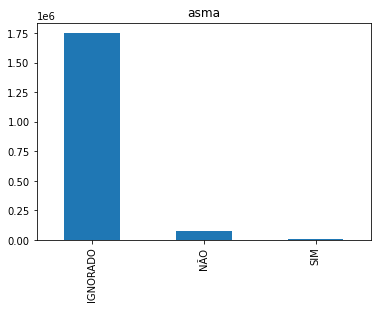

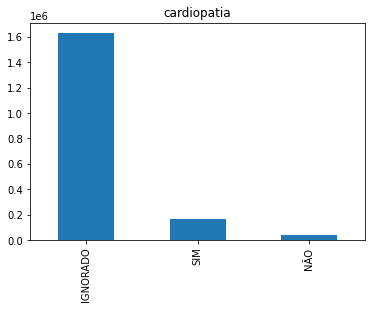

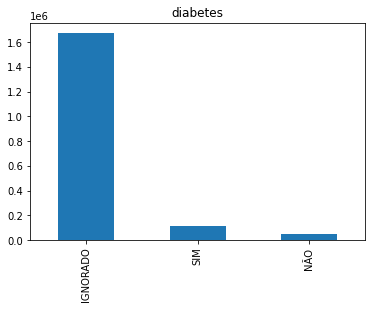

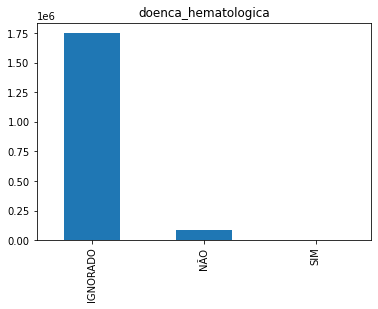

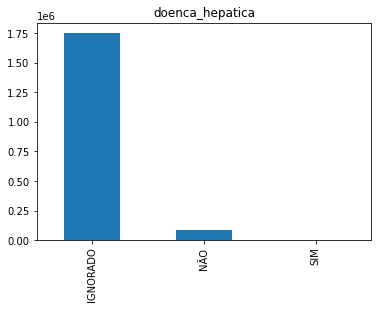

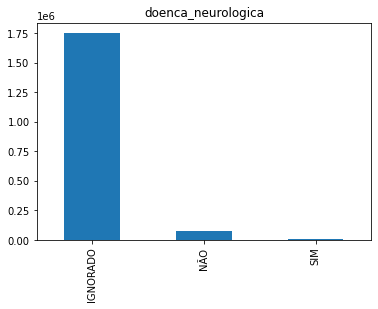

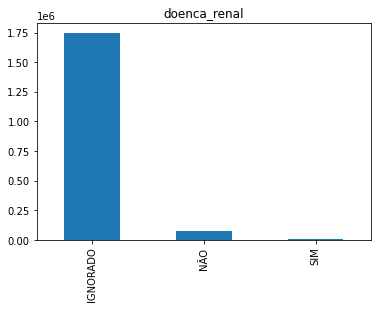

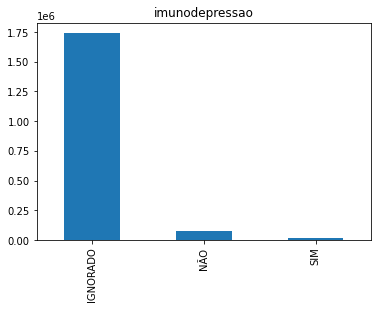

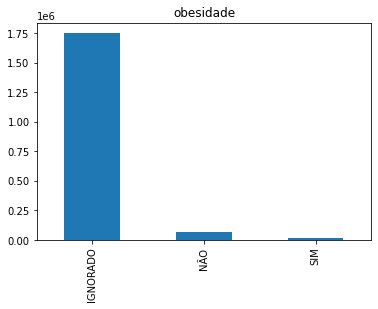

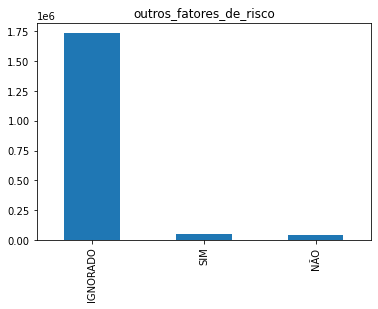

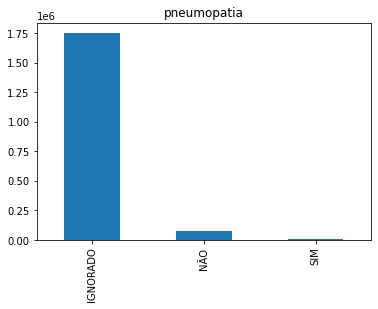

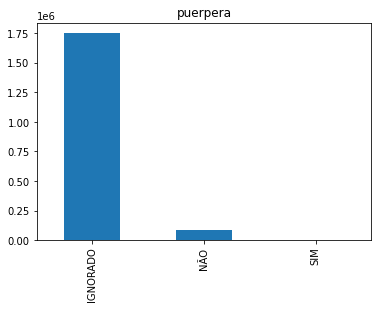

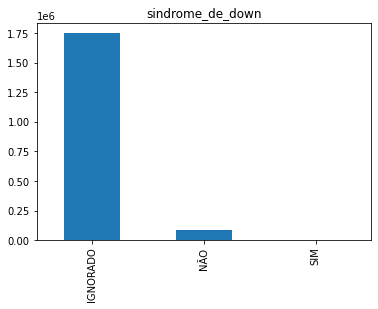

CPU times: user 3.87 s, sys: 1.36 s, total: 5.23 s
Wall time: 3.83 s


In [54]:
%%time
colunas_doencas = ['asma', 'cardiopatia', 'diabetes',
       'doenca_hematologica', 'doenca_hepatica', 'doenca_neurologica',
       'doenca_renal', 'imunodepressao', 'obesidade',
       'outros_fatores_de_risco', 'pneumopatia', 'puerpera',
       'sindrome_de_down']

for coluna in colunas_doencas:
  df[coluna].value_counts().plot.bar(title=coluna)
  plt.show();

### 3.5.1 Teste de hipótese para ver se a amostra sem IGNORADO difere do conjunto completo

Como uma ideia de solucionar, pensamos em utilizar o dataframe limpo de campos com IGNORADO que obtemos no início e focar na cidade com maior número de casos, que é São Paulo. Mas antes, para validar se foge muito da população, vamos testar se o dataframe sem ignorados tem diferença estatísticamente relevante entre as idades.

Já criamos um grupo sem ignorados antes.

In [55]:
df_sem_ignorados.shape

(185800, 20)

Fazendo o Teste U.

H0 -> Não há diferença entre as idades dos grupos

H1 -> Há diferença entre as idades dos dois grupos

In [56]:
teste2 = stats.mannwhitneyu(df_sem_ignorados['idade'], df['idade'], alternative="two-sided")

In [57]:
print('O valor da estatística do Teste U: ' + str(teste2[0]))
print('O valor de p do Teste U: ' + str(teste2[1]))

O valor da estatística do Teste U: 274713862311.5
O valor de p do Teste U: 0.0


Como p-valor < 0.5, refuto H0. Há diferença significativa de idade entre os grupos com IGNORADO e sem valores com IGNORADO.

Visualizando:

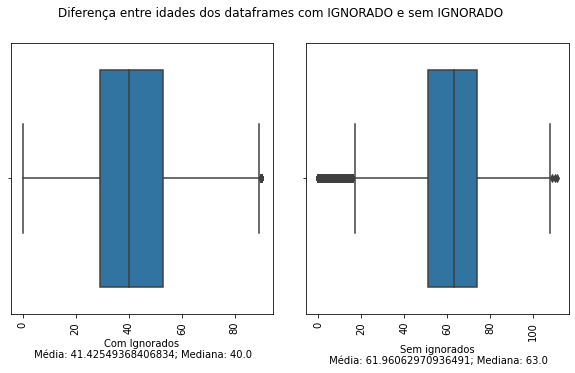

CPU times: user 386 ms, sys: 107 ms, total: 493 ms
Wall time: 378 ms


In [58]:
%%time
fig, axes = plt.subplots(1, 2, figsize = (10,5))
fig.subplots_adjust(hspace=0.5, wspace=0.125)
fig.suptitle('Diferença entre idades dos dataframes com IGNORADO e sem IGNORADO')

#Idade - Boxplot
sns.boxplot(ax=axes[0],x=df['idade'])
axes[0].tick_params(axis='x', rotation=90)
axes[0].set(xlabel='Com Ignorados\n Média: ' + str(df['idade'].mean()) + '; Mediana: ' + str(df['idade'].median()))

#Idade - Boxplot
sns.boxplot(ax=axes[1],x=df_sem_ignorados['idade'])
axes[1].tick_params(axis='x', rotation=90)
axes[1].set(xlabel='Sem ignorados\n Média: ' + str(df_sem_ignorados['idade'].mean()) + '; Mediana: ' + str(df_sem_ignorados['idade'].median()))

plt.show();

Temos que diferem muito nas distribuições das idades.

### 3.5.1 Teste de hipótese para ver se a amostra sem IGNORADO da cidade de São Paulo difere do conjunto completo

Hipóteses:

H0 -> Os dados não mostram diferenças de idade entre os grupos

H1 -> O grupos tem diferenças de idades

Obtendo os grupos.

In [59]:
%%time
df_sp = df.loc[df.nome_munic == 'São Paulo']
df_sp_si = df_sem_ignorados.loc[df_sem_ignorados.nome_munic == 'São Paulo']

CPU times: user 217 ms, sys: 2.8 ms, total: 220 ms
Wall time: 220 ms


Fazendo o teste

In [60]:
teste3 = stats.mannwhitneyu(df_sp_si['idade'], df_sp['idade'], alternative="two-sided")

In [61]:
print('O valor da estatística do Teste U: ' + str(teste3[0]))
print('O valor de p do Teste U: ' + str(teste3[1]))

O valor da estatística do Teste U: 14957916573.0
O valor de p do Teste U: 0.0


Com p-valor < 0.5, rejeita-se a hipótese nula. A distribuição das idades são diferentes.

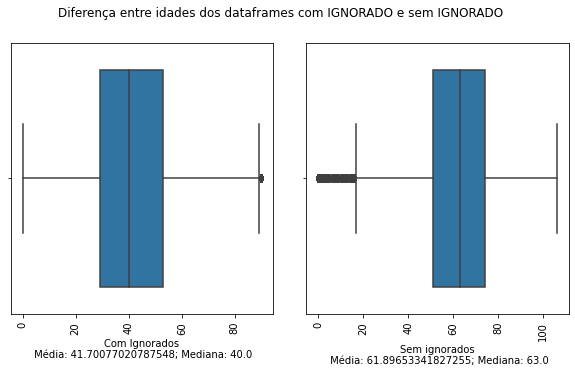

CPU times: user 294 ms, sys: 111 ms, total: 405 ms
Wall time: 306 ms


In [62]:
%%time
fig, axes = plt.subplots(1, 2, figsize = (10,5))
fig.subplots_adjust(hspace=0.5, wspace=0.125)
fig.suptitle('Diferença entre idades dos dataframes com IGNORADO e sem IGNORADO')

#Idade - Boxplot
sns.boxplot(ax=axes[0],x=df_sp['idade'])
axes[0].tick_params(axis='x', rotation=90)
axes[0].set(xlabel='Com Ignorados\n Média: ' + str(df_sp['idade'].mean()) + '; Mediana: ' + str(df_sp['idade'].median()))

#Idade - Boxplot
sns.boxplot(ax=axes[1],x=df_sp_si['idade'])
axes[1].tick_params(axis='x', rotation=90)
axes[1].set(xlabel='Sem ignorados\n Média: ' + str(df_sp_si['idade'].mean()) + '; Mediana: ' + str(df_sp_si['idade'].median()))

plt.show();

Será que a relação de idade e óbito que vimos antes muda em São Paulo com relação ao conjunto completo?

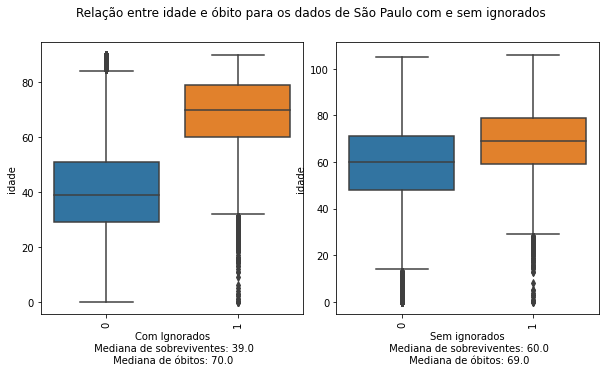

CPU times: user 507 ms, sys: 92.2 ms, total: 599 ms
Wall time: 504 ms


In [63]:
%%time
fig, axes = plt.subplots(1, 2, figsize = (10,5))
fig.subplots_adjust(hspace=0.5, wspace=0.125)
fig.suptitle('Relação entre idade e óbito para os dados de São Paulo com e sem ignorados')

#Idade - Boxplot
sns.boxplot(ax=axes[0],x=df_sp['obito'], y=df_sp['idade'])
axes[0].tick_params(axis='x', rotation=90)
axes[0].set(xlabel='Com Ignorados\n Mediana de sobreviventes: ' + str(df_sp.loc[df_sp['obito'] == 0]['idade'].median()) + '\n Mediana de óbitos: ' + str(df_sp.loc[df_sp['obito'] == 1]['idade'].median()))

#Idade - Boxplot
sns.boxplot(ax=axes[1],x=df_sp_si['obito'], y=df_sp_si['idade'])
axes[1].tick_params(axis='x', rotation=90)
axes[1].set(xlabel='Sem ignorados\n Mediana de sobreviventes: ' + str(df_sp_si.loc[df_sp_si['obito'] == 0]['idade'].median()) + '\n Mediana de óbitos: ' + str(df_sp_si.loc[df_sp_si['obito'] == 1]['idade'].median()))

plt.show();

Muda bastante a distribuição de sobreviventes, jogando a mediana para valores de idades mais altos. Muda pouco a distribuição de óbitos. Mas conserva a relação idade/óbito.

### 3.5.2 Teste para validar se o conjunto para a cidade de São Paulo sem IGNORADO conserva a relação de que pessoas com maior idade são mais propensas à complicações

Hipóteses:

H0 -> Os dados não mostram diferenças de idade entre os grupos

H1 -> O grupo de óbitos tem idades maiores

Obtendo os grupos.

In [64]:
%%time
obitos_sp = df_sp_si.loc[df_sp_si.obito == 1]
sobreviventes_sp = df_sp_si.loc[df_sp_si.obito == 0]

CPU times: user 18.9 ms, sys: 1.84 ms, total: 20.8 ms
Wall time: 20.5 ms


In [65]:
%%time
teste4 = stats.mannwhitneyu(obitos_sp['idade'], sobreviventes_sp['idade'], alternative="greater")

CPU times: user 30.2 ms, sys: 0 ns, total: 30.2 ms
Wall time: 35.9 ms


In [66]:
print('O valor da estatística do Teste U: ' + str(teste4[0]))
print('O valor de p do Teste U: ' + str(teste4[1]))

O valor da estatística do Teste U: 207180157.5
O valor de p do Teste U: 0.0


Como p-valor < 0.5, rejeitamos HO e concluímos que a relação idade/óbito ainda se mantém. A partir de agora, vamos utilizar utilizar a amostra da cidade de São Paulo sem doenças com valores IGNORADOS.

In [67]:
df_sp_si.shape

(37674, 20)

OBSERVAÇÕES:

* Ao resumir os dados retirando registros onde aparecem 'IGNORADO' nos campos de doenças, diminuímos o conjunto original de 5.852.960 registros para o Estado de São Paulo todo para 37.674 registros completos da cidade de São Paulo. Em produção, é possível que o comportamento das populações da capital e do estado sejam totalmente diferentes.
* Apesar da fonte oficial, é difícil dizer se os registros foram preenchidos corretamente e se são 100% confiáveis.

### 3.5.3 Análise descritiva dos dados da cidade de São Paulo

In [68]:
df_sp_si.describe(include='all')

,nome_munic,codigo_ibge,idade,cs_sexo,diagnostico_covid19,data_inicio_sintomas,obito,asma,cardiopatia,diabetes,doenca_hematologica,doenca_hepatica,doenca_neurologica,doenca_renal,imunodepressao,obesidade,outros_fatores_de_risco,pneumopatia,puerpera,sindrome_de_down
count,37674,37674.00000,37674.00000,37674,37674,37673,37674.00000,37674,37674,37674,37674,37674,37674,37674,37674,37674,37674,37674,37674,37674
unique,1,NaN,NaN,2,1,851,NaN,2,2,2,2,2,2,2,2,2,2,2,2,2
top,São Paulo,NaN,NaN,MASCULINO,CONFIRMADO,2021-03-01 00:00:00+00:00,NaN,NÃO,SIM,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO
freq,37674,NaN,NaN,19774,37674,206,NaN,35739,21640,23621,37085,37118,35217,35388,35789,32573,21643,35465,37532,37521
first,NaN,NaN,NaN,NaN,NaN,2020-03-01 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,2022-07-16 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,3550308.00000,61.89653,NaN,NaN,NaN,0.33015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,0.00000,17.07319,NaN,NaN,NaN,0.47027,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,3550308.00000,0.00000,NaN,NaN,NaN,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,3550308.00000,51.00000,NaN,NaN,NaN,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* Há 37.674 casos confirmados n cidade de São Paulo
* Há mais casos confirmados entre Homens

<AxesSubplot:ylabel='Frequency'>

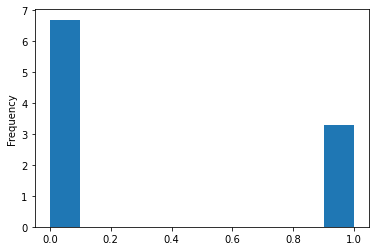

In [69]:
df_sp_si['obito'].plot.hist(density=True)

## 3.6 Visualização das features de doenças

In [70]:
df_sp_si.columns

Index(['nome_munic', 'codigo_ibge', 'idade', 'cs_sexo', 'diagnostico_covid19',
       'data_inicio_sintomas', 'obito', 'asma', 'cardiopatia', 'diabetes',
       'doenca_hematologica', 'doenca_hepatica', 'doenca_neurologica',
       'doenca_renal', 'imunodepressao', 'obesidade',
       'outros_fatores_de_risco', 'pneumopatia', 'puerpera',
       'sindrome_de_down'],
      dtype='object')

In [71]:
df_doencas = df_sp_si[['asma', 'cardiopatia', 'diabetes',
       'doenca_hematologica', 'doenca_hepatica', 'doenca_neurologica',
       'doenca_renal', 'imunodepressao', 'obesidade',
       'outros_fatores_de_risco', 'pneumopatia', 'puerpera',
       'sindrome_de_down']]
df_doencas.head(2)

,asma,cardiopatia,diabetes,doenca_hematologica,doenca_hepatica,doenca_neurologica,doenca_renal,imunodepressao,obesidade,outros_fatores_de_risco,pneumopatia,puerpera,sindrome_de_down
229500,NÃO,SIM,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,SIM,NÃO,NÃO,NÃO
229511,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,SIM,NÃO,SIM,NÃO,NÃO


### 3.6.1 Visualizações

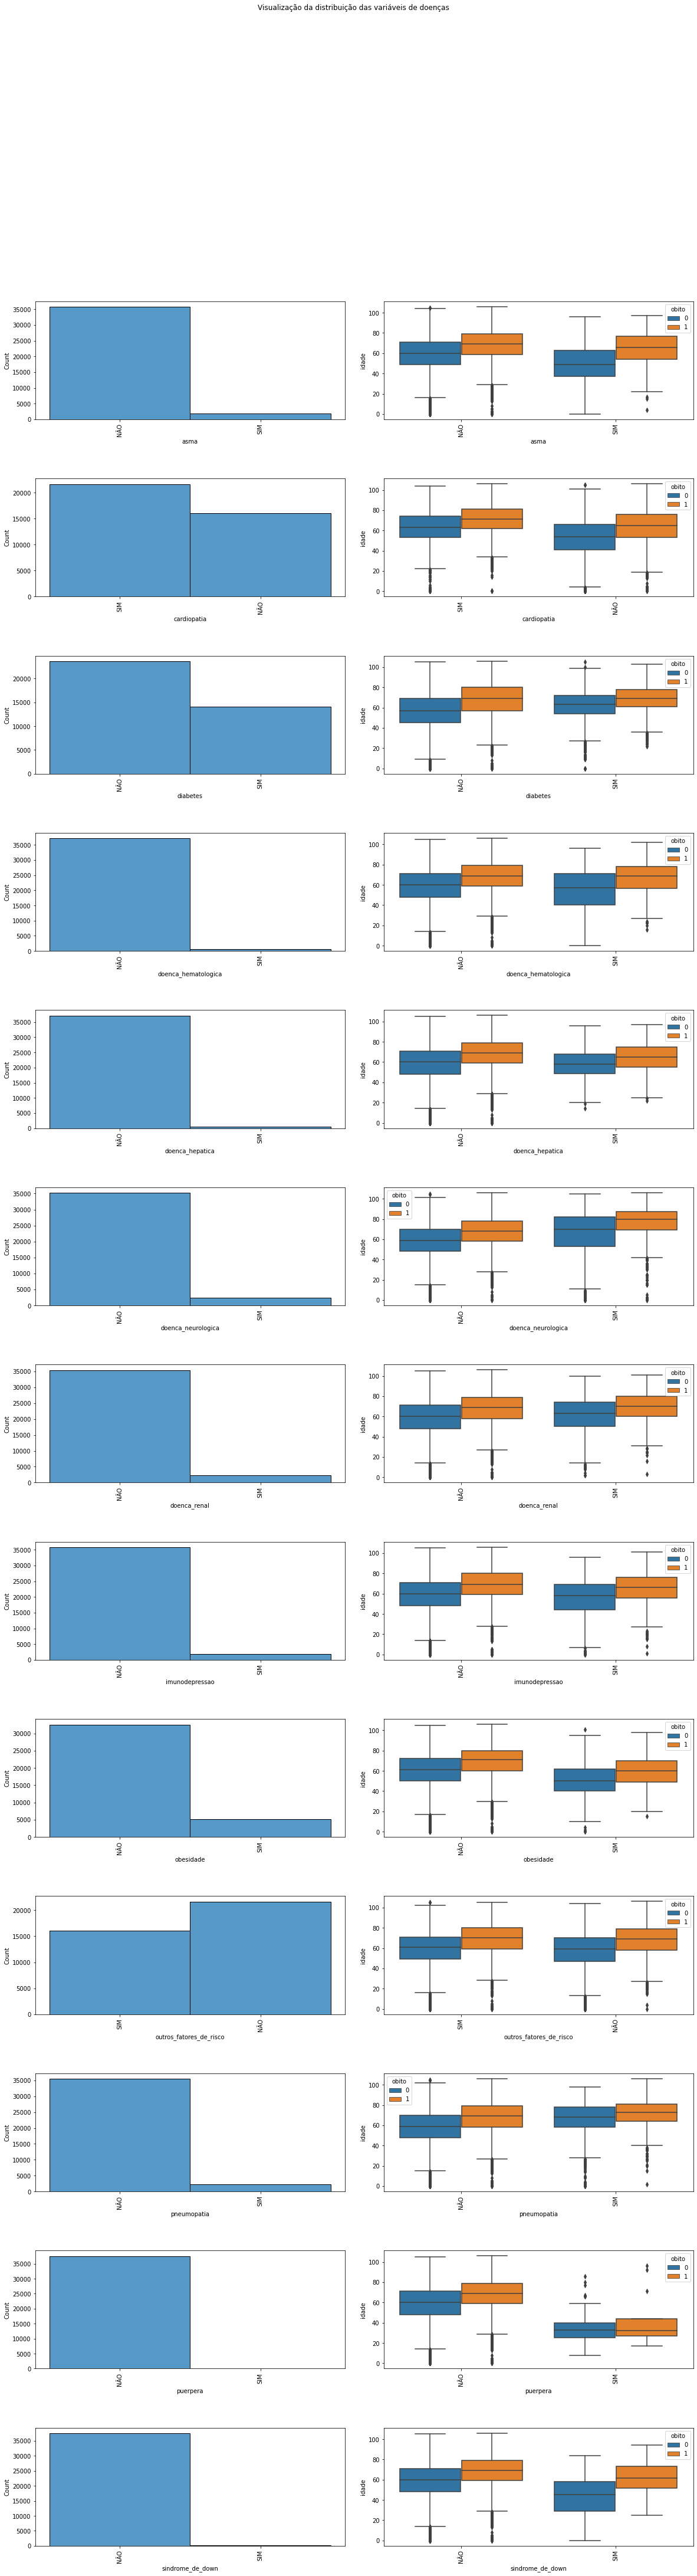

CPU times: user 7.17 s, sys: 259 ms, total: 7.43 s
Wall time: 7.39 s


In [72]:
%%time
fig1, axes1 = plt.subplots(len(df_doencas.columns), 2, figsize = (20,70))
fig1.subplots_adjust(hspace=0.5, wspace=0.125)
fig1.suptitle('Visualização da distribuição das variáveis de doenças')


for i, doenca in enumerate(df_doencas.columns):
  #Frequencia
  sns.histplot(ax=axes1[i][0],x=df_sp_si[doenca])
  axes1[i][0].tick_params(axis='x', rotation=90)

  #Boxplot
  sns.boxplot(ax=axes1[i][1],x=df_sp_si[doenca], y=df_sp_si['idade'], hue=df_sp_si['obito'])
  axes1[i][1].tick_params(axis='x', rotation=90)

plt.show();

# 4 Preparar os dados para expor melhor os padrões de dados subjacentes aos algoritmos de aprendizado de máquina.

In [73]:
df_sp_si.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37674 entries, 229500 to 4386909
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   nome_munic               37674 non-null  object             
 1   codigo_ibge              37674 non-null  int64              
 2   idade                    37674 non-null  float64            
 3   cs_sexo                  37674 non-null  object             
 4   diagnostico_covid19      37674 non-null  object             
 5   data_inicio_sintomas     37673 non-null  datetime64[ns, UTC]
 6   obito                    37674 non-null  int64              
 7   asma                     37674 non-null  object             
 8   cardiopatia              37674 non-null  object             
 9   diabetes                 37674 non-null  object             
 10  doenca_hematologica      37674 non-null  object             
 11  doenca_hepatica      

## 4.1 Excluindo algumas colunas

Como a intenção do projeto é prever óbitos de covid com base em doenças pré-existentes, vou retirar as colunas de gravidez e Síndrome de Down. Outro fator é que elas estão muito desbalanceadas. Também vou retirar a coluna de outros_fatores_de_risco, pois não dá para saber o que representa.

In [74]:
del df_sp_si['outros_fatores_de_risco']
del df_sp_si['puerpera']
del df_sp_si['sindrome_de_down']

## 4.1 Transformando respostas 'SIM' ou 'NÃO' em 1 e 0, respectivamente.

In [75]:
df_pronto = df_sp_si.replace('SIM', 1)
df_pronto = df_pronto.replace('NÃO', 0)

## 4.2 Convertendo 'MASCULINO' e 'FEMININO' em 0 e 1, respectivamente

In [76]:
df_pronto = df_pronto.replace('MASCULINO', 0)
df_pronto = df_pronto.replace('FEMININO', 1)

## 4.3 Selecionando as features que vamos utilizar

In [77]:
df_pronto.columns

Index(['nome_munic', 'codigo_ibge', 'idade', 'cs_sexo', 'diagnostico_covid19',
       'data_inicio_sintomas', 'obito', 'asma', 'cardiopatia', 'diabetes',
       'doenca_hematologica', 'doenca_hepatica', 'doenca_neurologica',
       'doenca_renal', 'imunodepressao', 'obesidade', 'pneumopatia'],
      dtype='object')

In [78]:
df_ml = df_pronto[['idade', 'cs_sexo', 'obito', 'asma', 'cardiopatia', 'diabetes',
       'doenca_hematologica', 'doenca_hepatica', 'doenca_neurologica',
       'doenca_renal', 'imunodepressao', 'obesidade', 'pneumopatia']]

In [79]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37674 entries, 229500 to 4386909
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   idade                37674 non-null  float64
 1   cs_sexo              37674 non-null  int64  
 2   obito                37674 non-null  int64  
 3   asma                 37674 non-null  int64  
 4   cardiopatia          37674 non-null  int64  
 5   diabetes             37674 non-null  int64  
 6   doenca_hematologica  37674 non-null  int64  
 7   doenca_hepatica      37674 non-null  int64  
 8   doenca_neurologica   37674 non-null  int64  
 9   doenca_renal         37674 non-null  int64  
 10  imunodepressao       37674 non-null  int64  
 11  obesidade            37674 non-null  int64  
 12  pneumopatia          37674 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 5.0 MB


## 4.4 Análise de correlação

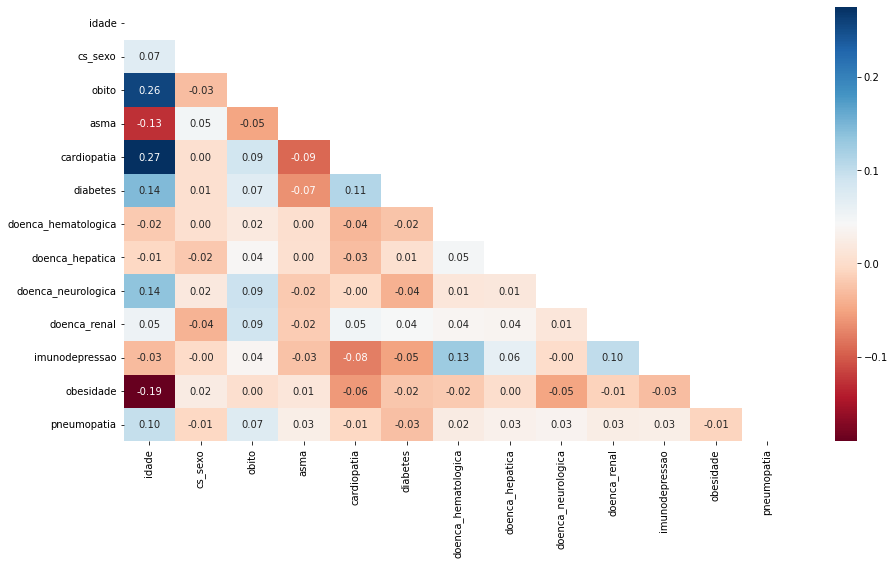

CPU times: user 864 ms, sys: 122 ms, total: 987 ms
Wall time: 955 ms


In [80]:
%%time
sns.set_context(font_scale=1.9)
plt.figure(figsize=(15,8))
sns.heatmap(
    df_ml.corr(), annot=True, fmt='.2f', cmap='RdBu', mask=np.triu(np.ones_like(df_ml.corr())))
plt.show()

* A feature idade tem uma correlação positiva com a feature obito.
* A feature idade tem uma correlação positiva com cardiopatia.

## 4.5 Visualização da variável target

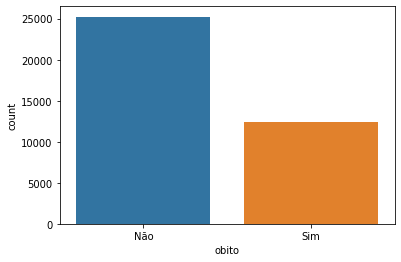

In [197]:
g = sns.countplot(df_ml['obito'])
g.set_xticklabels(['Não', 'Sim'])
plt.show()

## 4.5 Separando em datasets de features e target

In [201]:
df_ml.columns

Index(['idade', 'cs_sexo', 'obito', 'asma', 'cardiopatia', 'diabetes',
       'doenca_hematologica', 'doenca_hepatica', 'doenca_neurologica',
       'doenca_renal', 'imunodepressao', 'obesidade', 'pneumopatia'],
      dtype='object')

In [202]:
X = df_ml[['idade', 'cs_sexo', 'asma', 'cardiopatia', 'diabetes',
       'doenca_hematologica', 'doenca_hepatica', 'doenca_neurologica',
       'doenca_renal', 'imunodepressao', 'obesidade', 'pneumopatia']]

In [203]:
y = df_ml['obito']

## 4.6 Tratando o desbalanceamento com oversampling

### 4.6.1 IMportando o imbalanced-learn

In [204]:
df_ml_bk = df_ml.copy()

In [205]:
#!pip install imbalanced-learn

In [209]:
from imblearn.over_sampling import SMOTE
from collections import Counter

### 4.6.2 Aplicando o oversampling

In [208]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [210]:
contagem = Counter(y)
print(contagem)

Counter({0: 25236, 1: 25236})


## 4.9 Separação do conjunto em conjuntos de treino e teste

In [211]:
from sklearn.model_selection import train_test_split
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, 
                                                    test_size=0.33, 
                                                    random_state=42,
                                                    shuffle=True)

# 5 Explorar modelos diferentes de classificação e selecionar os melhores.

In [212]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

## 5.1 Logistic Regression

Importando função da [scikit-learn](https://scikit-learn.org/stable/):

In [213]:
from sklearn.linear_model import LogisticRegression

### 5.1.1 Chamando a função

In [214]:
logreg = LogisticRegression()
logreg

LogisticRegression()

### 5.1.2 Treinando o modelo

In [215]:
%%time
logreg.fit(X_treino, y_treino)

CPU times: user 805 ms, sys: 527 ms, total: 1.33 s
Wall time: 715 ms


LogisticRegression()

### 5.1.3 Predição

Visualização das probabilidades da Regressão Logística

In [216]:
%%time
y_pred = logreg.predict(X_teste)

CPU times: user 6.25 ms, sys: 3.03 ms, total: 9.28 ms
Wall time: 10.9 ms


In [217]:
%%time
y_pred_proba = logreg.predict_proba(X)
print(y_pred_proba)

[[0.51153575 0.48846425]
 [0.34088078 0.65911922]
 [0.45579899 0.54420101]
 ...
 [0.37803314 0.62196686]
 [0.738853   0.261147  ]
 [0.41441587 0.58558413]]
CPU times: user 12.7 ms, sys: 1.03 ms, total: 13.8 ms
Wall time: 9.27 ms


### 5.1.4 Métricas

#### 5.1.4.1 Acurácia

In [218]:
%%time
print(f'Acurácia normal: {accuracy_score(y_teste, y_pred)}')
print(f'Acurácia com validação cruzada: {cross_val_score(logreg, X_treino, y_treino, cv=10, scoring="accuracy")}')

Acurácia normal: 0.6274015369836695
Acurácia com validação cruzada: [0.62093436 0.63128326 0.6253696  0.61383797 0.61709048 0.62803075
 0.64507542 0.62732919 0.64359657 0.6302869 ]
CPU times: user 6.17 s, sys: 3.93 s, total: 10.1 s
Wall time: 5.25 s


#### 5.1.4.2 Matriz de Confusão

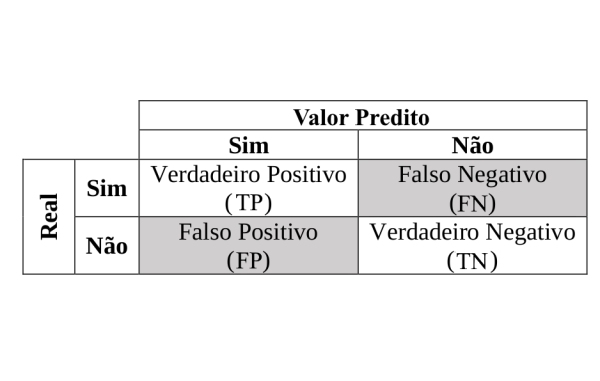

Matriz da validação cruzada

In [219]:
%%time
y_treino_pred_cv = cross_val_predict(logreg, X_treino, y_treino, cv=10)

CPU times: user 6.44 s, sys: 4.03 s, total: 10.5 s
Wall time: 5.49 s


CPU times: user 61.5 ms, sys: 6.04 ms, total: 67.5 ms
Wall time: 69.7 ms


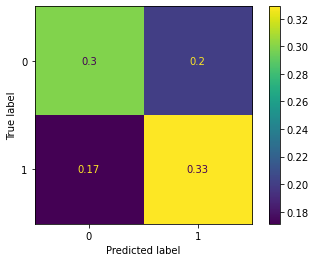

In [220]:
%%time
cm_logreg = confusion_matrix(y_treino, y_treino_pred_cv, normalize='all')
disp = ConfusionMatrixDisplay(confusion_matrix=cm_logreg, display_labels=logreg.classes_)
disp.plot(values_format='.2g') 

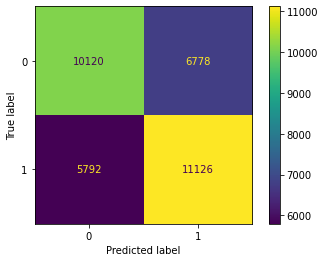

In [221]:
cm_logreg = confusion_matrix(y_treino, y_treino_pred_cv)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_logreg, display_labels=logreg.classes_)
disp.plot(values_format='d') 

Matriz do modelo normal (logreg)

CPU times: user 51.9 ms, sys: 0 ns, total: 51.9 ms
Wall time: 54 ms


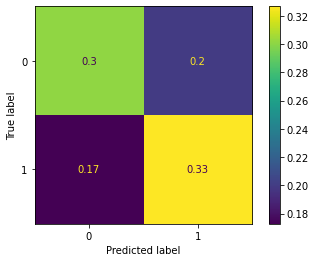

In [222]:
%%time
cm_logreg2 = confusion_matrix(y_teste, y_pred, normalize='all')
disp = ConfusionMatrixDisplay(confusion_matrix=cm_logreg2, display_labels=logreg.classes_)
disp.plot(values_format='.2g') 

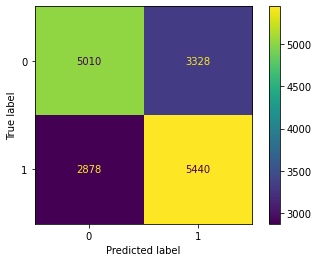

In [223]:
cm_logreg2 = confusion_matrix(y_teste, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_logreg2, display_labels=logreg.classes_)
disp.plot(values_format='d') 

O retorno de Falsos Negativos está muito alto. 

#### 5.1.4.3 Precisão e Recall

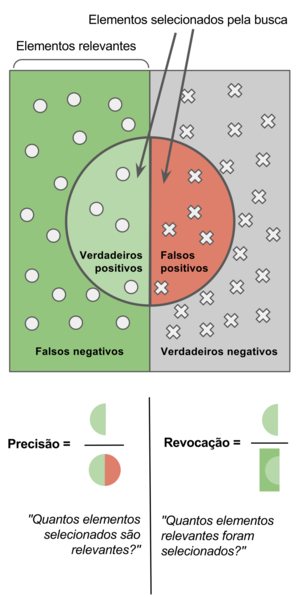

##### 5.1.4.3.1 Precisão

Sem validação cruzada

In [224]:
%%time
precision_score(y_teste, y_pred, pos_label=0)

CPU times: user 13 ms, sys: 842 µs, total: 13.8 ms
Wall time: 14.7 ms


0.6351419878296146

Com validação cruzada

In [225]:
%%time
precision_score(y_treino, y_treino_pred_cv, pos_label=0)

CPU times: user 28.1 ms, sys: 0 ns, total: 28.1 ms
Wall time: 36.6 ms


0.6359979889391654

##### 5.1.4.3.2 Revocação

Sem validação cruzada

In [226]:
%%time
recall_score(y_teste, y_pred, pos_label=0)

CPU times: user 11.5 ms, sys: 67 µs, total: 11.5 ms
Wall time: 13.3 ms


0.6008635164307987

Com validação cruzada

In [227]:
%%time
recall_score(y_treino, y_treino_pred_cv, pos_label=0)

CPU times: user 20.7 ms, sys: 2.9 ms, total: 23.6 ms
Wall time: 26.6 ms


0.598887442300864

##### 5.1.2.3.3 Visualização Precisão x Revocação

Sem validação cruzada

CPU times: user 53.3 ms, sys: 33.2 ms, total: 86.4 ms
Wall time: 51.6 ms


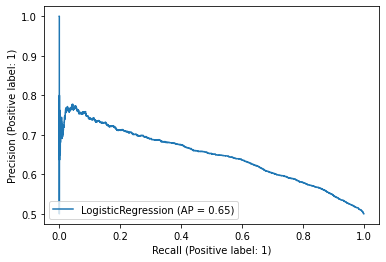

In [228]:
%%time
disp = PrecisionRecallDisplay.from_estimator(logreg, X_teste, y_teste)

Com validação cruzada

In [229]:
%%time
#Retorna os scores de decisões, e não as predições, da função de validação cruzada
y_scores = cross_val_predict(logreg, X_treino, y_treino, cv=10, method='decision_function')

CPU times: user 6.36 s, sys: 4 s, total: 10.4 s
Wall time: 5.4 s


In [230]:
%%time
precisoes, revocacoes, thresholds = precision_recall_curve(y_treino, y_scores)

CPU times: user 11.5 ms, sys: 4.97 ms, total: 16.4 ms
Wall time: 15.9 ms


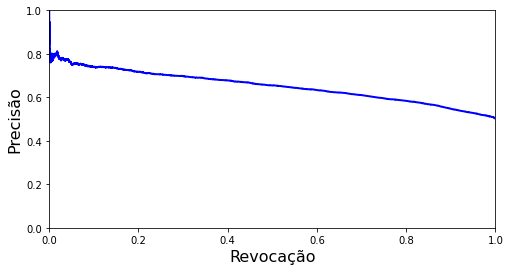

In [231]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Revocação", fontsize=16)
    plt.ylabel("Precisão", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 4))
plot_precision_vs_recall(precisoes, revocacoes)
plt.show()

#### 5.1.4.4 F1 Score

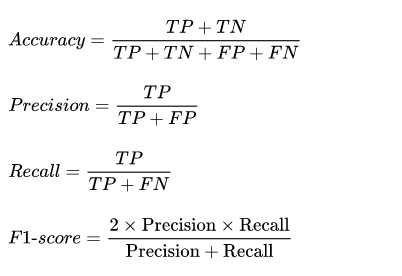

Sem validação

In [232]:
f1_score(y_teste, y_pred, pos_label = 0)

0.6175274251201774

Com validação

In [233]:
f1_score(y_treino, y_treino_pred_cv, pos_label = 0)

0.6168850960073149

#### 5.1.4.5 Avaliação do modelo

* As métricas da regressão logística com e sem validação cruzada diferem muito pouco
* A acurácia de 0.68 indica que o modelo acerta 68% das predições.
* A precisão de 0.70 indica que quando o modelo afirma que um caso virá a óbito, ele acerta 70% das vezes. A revocação de 0.92 indica que o modelo detecta 92% dos óbitos.
* Este modelo não seria um bom classificador para este estudo. Vamos tentar melhorá-lo trabalhando com *Trade-off precisão/revocação* para buscar aumentar a revocação. A precisão pode diminuir bastante, mas um número maior de óbitos poderão ser detectados.

## 5.2 Decision Tree

### 5.2.1 Chamando a função

In [234]:
from sklearn.tree import DecisionTreeClassifier

In [235]:
ardec = DecisionTreeClassifier(max_depth=2)

### 5.2.2 Treinando o modelo

In [236]:
%%time
ardec.fit(X_treino, y_treino)

CPU times: user 17.1 ms, sys: 1.91 ms, total: 19.1 ms
Wall time: 21.8 ms


DecisionTreeClassifier(max_depth=2)

### 5.2.3 Predição

In [237]:
%%time
y_pred2 = ardec.predict(X_teste)

CPU times: user 6.44 ms, sys: 21 µs, total: 6.46 ms
Wall time: 6.98 ms


### 5.2.4 Métricas

#### 5.2.4.1 Acurácia

In [238]:
print(f'Acurácia: {accuracy_score(y_teste, y_pred2)}')

Acurácia: 0.6163544668587896


#### 5.4.2.2 Matriz de confusão

CPU times: user 58.8 ms, sys: 1.95 ms, total: 60.7 ms
Wall time: 63.5 ms


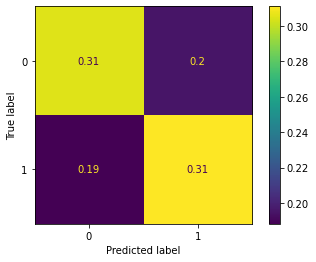

In [239]:
%%time
cm_ardec = confusion_matrix(y_teste, y_pred2, normalize='all')
disp = ConfusionMatrixDisplay(confusion_matrix=cm_ardec, display_labels=ardec.classes_)
disp.plot(values_format='.2g') 

CPU times: user 49.3 ms, sys: 0 ns, total: 49.3 ms
Wall time: 49.2 ms


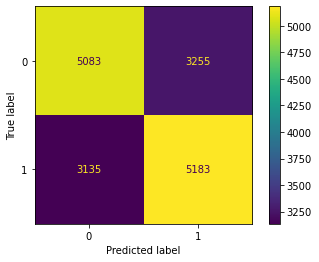

In [240]:
%%time
cm_ardec = confusion_matrix(y_teste, y_pred2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_ardec, display_labels=ardec.classes_)
disp.plot(values_format='d') 

#### 5.4.2.3 Precisão e revocação

##### 5.4.2.3.1 Precisão

In [241]:
%%time
print(f'Precisão: {precision_score(y_teste, y_pred2, pos_label=0)}')

Precisão: 0.6185203212460453
CPU times: user 13 ms, sys: 1e+03 µs, total: 14 ms
Wall time: 13 ms


##### 5.4.2.3.2 Revocação

In [242]:
%%time
print(f'Revocação: {recall_score(y_teste, y_pred2, pos_label=0)}')

Revocação: 0.6096186135763972
CPU times: user 13.3 ms, sys: 17 µs, total: 13.3 ms
Wall time: 14.9 ms


##### 5.4.2.3.3 Visualização Precisão x Revocação

CPU times: user 34 ms, sys: 1.9 ms, total: 35.9 ms
Wall time: 39.7 ms


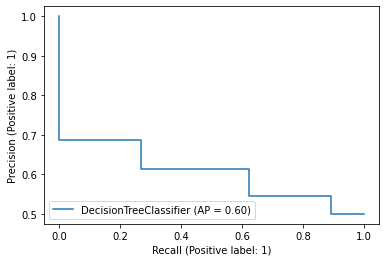

In [243]:
%%time
disp = PrecisionRecallDisplay.from_estimator(ardec, X_teste, y_teste)

#### 5.2.4.4 F1 Score

In [244]:
print(f'F1 Score: {f1_score(y_teste, y_pred2, pos_label = 0)}')

F1 Score: 0.6140372070548442


#### 5.2.4.5 Avaliação

* A acurácia de 0.68 indica que o modelo acerta 68% das predições.
* A precisão de 0.71 indica que quando o modelo afirma que um caso virá a óbito, ele acerta 70% das vezes. A revocação de 0.86 indica que o modelo detecta 86% dos óbitos.
* Este modelo não seria um bom classificador para este estudo.
* Vamos tentar melhorá-lo trabalhando com Trade-off precisão/revocação para buscar aumentar a revocação. A precisão pode diminuir bastante, mas um número maior de óbitos poderão ser detectados.



## 5.3 SVM

### 5.3.1 Chamando a função

In [245]:
from sklearn.svm import SVC

### 5.3.2 Treinando o modelo

In [246]:
%%time
svm = SVC()
svm.fit(X_treino, y_treino)

CPU times: user 1min 17s, sys: 148 ms, total: 1min 17s
Wall time: 1min 17s


### 5.3.3 Predição

In [247]:
%%time
y_pred_svm = svm.predict(X_teste)

CPU times: user 31.8 s, sys: 34.2 ms, total: 31.9 s
Wall time: 31.9 s


In [248]:
y_pred_svm

array([0, 1, 0, ..., 1, 0, 1])

### 5.3.4 Métricas

#### 5.3.4.1 Acurácia

In [249]:
print(f'Acurácia: {accuracy_score(y_teste, y_pred_svm)}')

Acurácia: 0.6186959654178674


#### 5.3.4.2 Matriz de confusão

CPU times: user 59.3 ms, sys: 0 ns, total: 59.3 ms
Wall time: 59.4 ms


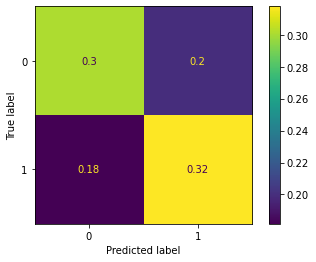

In [250]:
%%time
cm_svm = confusion_matrix(y_teste, y_pred_svm, normalize='all')
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=svm.classes_)
disp.plot(values_format='.2g') 

CPU times: user 48.6 ms, sys: 1.99 ms, total: 50.6 ms
Wall time: 50.2 ms


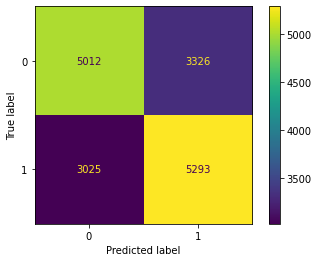

In [251]:
%%time
cm_svm = confusion_matrix(y_teste, y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=svm.classes_)
disp.plot(values_format='d') 

#### 5.3.4.3 Precisão

In [252]:
%%time
print(f'Precisão: {precision_score(y_teste, y_pred_svm, pos_label=0)}')

Precisão: 0.6236157770312306
CPU times: user 14.3 ms, sys: 978 µs, total: 15.3 ms
Wall time: 14.1 ms


#### 5.3.4.4 Revocação

In [253]:
%%time
print(f'Revocação: {recall_score(y_teste, y_pred_svm, pos_label=0)}')

Revocação: 0.6011033821060207
CPU times: user 11.3 ms, sys: 12 µs, total: 11.3 ms
Wall time: 14.2 ms


#### 5.3.4.5 Precisão x Revocação

CPU times: user 31.7 s, sys: 29.4 ms, total: 31.7 s
Wall time: 31.8 s


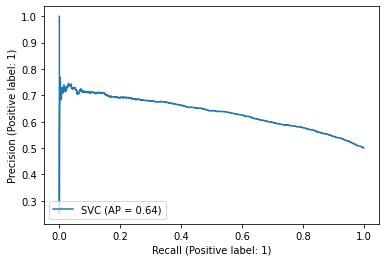

In [254]:
%%time
disp = PrecisionRecallDisplay.from_estimator(svm, X_teste, y_teste)

#### 5.3.4.6 F1 Score

In [255]:
print(f'F1 Score: {f1_score(y_teste,  y_pred_svm, pos_label = 0)}')

F1 Score: 0.6121526717557253


#### 5.3.4.7 Avaliação

* A acurácia de 0.67 indica que o modelo acerta 67% das predições.
* A precisão de 0.67 indica que quando o modelo afirma que um caso virá a óbito, ele acerta 67% das vezes. A revocação de 0.99 indica que o modelo detecta 99% dos óbitos.
Este modelo não seria um bom classificador para este estudo, porque há muitos falsos negativos. Ou seja, o modelo indica que não virá a óbito mas acontece o contrário.

## 5.4 KNN

### 5.4.1 Importando a função

In [256]:
from sklearn.neighbors import KNeighborsClassifier

### 5.4.2 Treinando o modelo

In [257]:
%%time
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_treino, y_treino)

CPU times: user 80 ms, sys: 998 µs, total: 81 ms
Wall time: 79.9 ms


### 5.4.3 Predição

In [258]:
%%time
y_pred_knn = knn.predict(X_teste)

CPU times: user 863 ms, sys: 8.01 ms, total: 871 ms
Wall time: 869 ms


### 5.4.4 Métricas

In [259]:
print(f'Acurácia: {accuracy_score(y_teste, y_pred_knn)}\n\Precisão: {precision_score(y_teste, y_pred_knn)}\n\
      Revocação: {recall_score(y_teste, y_pred_knn)} \nF1 Score: {f1_score(y_teste,  y_pred_knn, pos_label = 0)}')

Acurácia: 0.5644212295869356
\Precisão: 0.6173548244645617
      Revocação: 0.3361384948304881 
F1 Score: 0.6454923039335452


### 5.4.5 Matriz de confusão

CPU times: user 47.5 ms, sys: 925 µs, total: 48.4 ms
Wall time: 50.9 ms


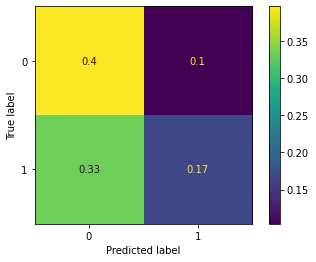

In [260]:
%%time
cm_knn = confusion_matrix(y_teste, y_pred_knn, normalize='all')
disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=knn.classes_)
disp.plot(values_format='.2g') 

CPU times: user 60.7 ms, sys: 4.15 ms, total: 64.8 ms
Wall time: 64.1 ms


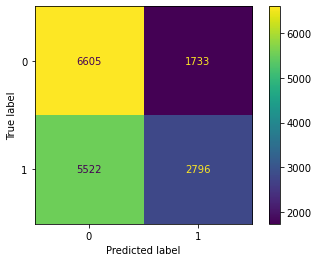

In [261]:
%%time
cm_knn = confusion_matrix(y_teste, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=knn.classes_)
disp.plot(values_format='d') 

### 5.4.6 Avaliação

* A acurácia de 0.65 indica que o modelo acerta 65% das predições.
* A precisão de 0.44 indica que quando o modelo afirma que um caso virá a óbito, ele acerta 44% das vezes. A revocação de 0.14 indica que o modelo detecta 14% dos óbitos.
* Este modelo não seria um bom classificador para este estudo, porque tem precisão e revocação muito baixos.

## 5.5 Naive Bayes

### 5.5.1 Importando a função

In [262]:
from sklearn.naive_bayes import GaussianNB

### 5.5.2 Treinando o modelo

In [263]:
%%time
nb = GaussianNB()
nb.fit(X_treino, y_treino)

CPU times: user 18.6 ms, sys: 209 µs, total: 18.8 ms
Wall time: 19.7 ms


### 5.5.3 Predição

In [264]:
%%time
y_pred_nb = nb.predict(X_teste)

CPU times: user 9.08 ms, sys: 94 µs, total: 9.18 ms
Wall time: 11.5 ms


### 5.5.4 Métricas

In [265]:
print(f'Acurácia: {accuracy_score(y_teste, y_pred_nb)}\n\Precisão: {precision_score(y_teste, y_pred_nb)}\n\
      Recall: {recall_score(y_teste, y_pred_nb)} \nF1 Score: {f1_score(y_teste,  y_pred_nb, pos_label = 0)}')

Acurácia: 0.6135326609029779
\Precisão: 0.6018628831365753
      Recall: 0.6680692474152441 
F1 Score: 0.5915868282469386


### 5.5.5 Matriz de confusão

CPU times: user 49.4 ms, sys: 919 µs, total: 50.3 ms
Wall time: 49.9 ms


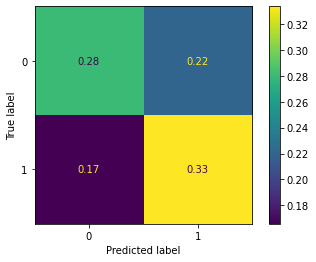

In [266]:
%%time
cm_nb = confusion_matrix(y_teste, y_pred_nb, normalize='all')
disp = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=nb.classes_)
disp.plot(values_format='.2g') 

CPU times: user 52.6 ms, sys: 22 µs, total: 52.7 ms
Wall time: 53.7 ms


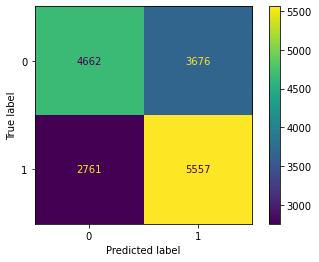

In [267]:
%%time
cm_nb = confusion_matrix(y_teste, y_pred_nb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=nb.classes_)
disp.plot(values_format='d') 

## 5.6 Random Forest Classifier

### 5.6.1 Importando

In [268]:
from sklearn.ensemble import RandomForestClassifier

### 5.6.2 Treinando o modelo

In [269]:
%%time
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_treino, y_treino)

CPU times: user 2.09 s, sys: 28.9 ms, total: 2.12 s
Wall time: 2.13 s


### 5.6.3 Predição

In [270]:
%%time
y_pred_rfc = rfc.predict(X_teste)

CPU times: user 408 ms, sys: 1.84 ms, total: 409 ms
Wall time: 410 ms


### 5.6.4 Métricas

In [271]:
print(f'Acurácia: {accuracy_score(y_teste, y_pred_rfc)}\n\Precisão: {precision_score(y_teste, y_pred_rfc)}\n\
      Recall: {recall_score(y_teste, y_pred_rfc)} \nF1 Score: {f1_score(y_teste,  y_pred_rfc, pos_label = 0)}')

Acurácia: 0.619716618635927
\Precisão: 0.6147882434621615
      Recall: 0.6387352729021399 
F1 Score: 0.6126467710371819


## 5.7 Testando o aprendizado ensemble

### 5.7.1 Importando

In [272]:
from sklearn.ensemble import VotingClassifier

In [273]:
svm2 = SVC(probability=True)

In [274]:
voting = VotingClassifier(
    estimators = [('logreg', logreg), ('ardec', ardec), ('svm', svm2), ('nb', nb)],
    voting='soft'
)

### 5.7.2 Treinando

In [275]:
%%time
voting.fit(X_treino, y_treino)

CPU times: user 9min 12s, sys: 1.29 s, total: 9min 13s
Wall time: 9min 12s


VotingClassifier(estimators=[('logreg', LogisticRegression()),
                             ('ardec', DecisionTreeClassifier(max_depth=2)),
                             ('svm', SVC(probability=True)),
                             ('nb', GaussianNB())],
                 voting='soft')

### 5.7.3 Predição

In [276]:
%%time
y_pred_en = voting.predict(X_teste)

CPU times: user 31.7 s, sys: 134 ms, total: 31.8 s
Wall time: 31.6 s


### 5.7.4 Métricas

In [277]:
print(f'Acurácia: {accuracy_score(y_teste, y_pred_en)}\n\Precisão: {precision_score(y_teste, y_pred_en)}\n\
      Recall: {recall_score(y_teste, y_pred_en)} \nF1 Score: {f1_score(y_teste,  y_pred_en, pos_label = 0)}')

Acurácia: 0.6257204610951008
\Precisão: 0.6178199909543193
      Recall: 0.6568886751622987 
F1 Score: 0.6139938080495356


### 5.7.5 Matriz de confusão

CPU times: user 53.3 ms, sys: 15 µs, total: 53.3 ms
Wall time: 55.3 ms


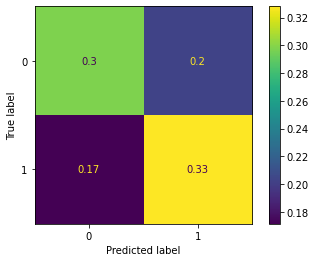

In [278]:
%%time
cm_en = confusion_matrix(y_teste, y_pred_en, normalize='all')
disp = ConfusionMatrixDisplay(confusion_matrix=cm_en, display_labels=voting.classes_)
disp.plot(values_format='.2g') 

CPU times: user 47.6 ms, sys: 17 µs, total: 47.7 ms
Wall time: 48.9 ms


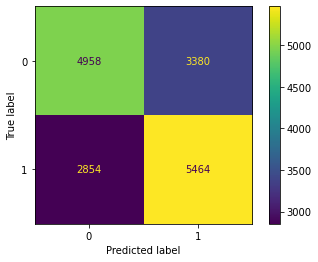

In [279]:
%%time
cm_en = confusion_matrix(y_teste, y_pred_en)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_en, display_labels=voting.classes_)
disp.plot(values_format='d') 

## 5.8 XGBoost

[Tutorial](https://dadosaocubo.com/o-guia-do-xgboost-com-python/).

### 5.8.1 Importando

In [280]:
#!pip install xgboost

In [281]:
from xgboost import XGBClassifier

In [282]:
%%time
xgb = XGBClassifier(n_estimators = 1000,
                    max_depth = 10, 
                    learning_rate = 0.01,
                    subsample = 1,
                    random_state=42,
                    eval_metric="auc")

CPU times: user 74 µs, sys: 2 µs, total: 76 µs
Wall time: 82.7 µs


### 5.8.2 Treinando o modelo

In [283]:
%%time
xgb.fit(X_treino, y_treino)

CPU times: user 53.7 s, sys: 156 ms, total: 53.9 s
Wall time: 53.9 s


XGBClassifier(eval_metric='auc', learning_rate=0.01, max_depth=10,
              n_estimators=1000, random_state=42)

### 5.6.3 Predição

In [284]:
%%time
y_pred_xgb = xgb.predict(X_teste)

CPU times: user 3.29 s, sys: 6.6 ms, total: 3.29 s
Wall time: 3.29 s


### 5.8.4 Métricas

In [285]:
print(f'Acurácia: {accuracy_score(y_teste, y_pred_xgb)}\n\Precisão: {precision_score(y_teste, y_pred_xgb)}\n\
      Recall: {recall_score(y_teste, y_pred_xgb)} \nF1 Score: {f1_score(y_teste,  y_pred_xgb, pos_label = 0)}')

Acurácia: 0.6281219980787704
\Precisão: 0.6244725738396625
      Recall: 0.6405385910074537 
F1 Score: 0.623739521321832


### 5.8.5 Matriz de confusão

CPU times: user 56.2 ms, sys: 0 ns, total: 56.2 ms
Wall time: 60 ms


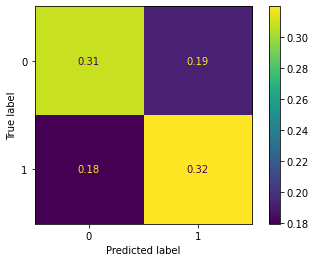

In [286]:
%%time
cm_xgb = confusion_matrix(y_teste, y_pred_xgb, normalize='all')
disp = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=xgb.classes_)
disp.plot(values_format='.2g') 

CPU times: user 51.4 ms, sys: 1.02 ms, total: 52.4 ms
Wall time: 50.6 ms


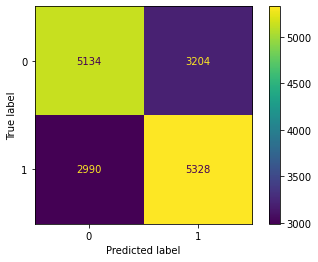

In [287]:
%%time
cm_xgb = confusion_matrix(y_teste, y_pred_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=xgb.classes_)
disp.plot(values_format='d') 

## 5.9 Curvas ROC

In [288]:
from sklearn import metrics

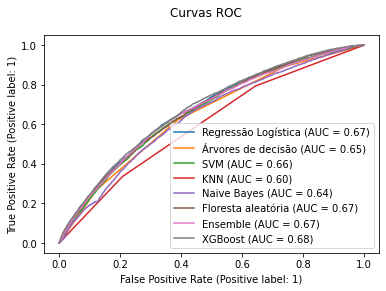

CPU times: user 1min 10s, sys: 330 ms, total: 1min 10s
Wall time: 1min 10s


In [289]:
%%time
curvas_roc = metrics.plot_roc_curve(logreg, X_teste, y_teste, 
                                              name='Regressão Logística')
curvas_roc = metrics.plot_roc_curve(ardec, X_teste, y_teste,
                                              name='Árvores de decisão', 
                                              ax=curvas_roc.ax_)
curvas_roc = metrics.plot_roc_curve(svm, X_teste, y_teste,
                                              name='SVM', 
                                              ax=curvas_roc.ax_)
curvas_roc = metrics.plot_roc_curve(knn, X_teste, y_teste,
                                              name='KNN', 
                                              ax=curvas_roc.ax_)
curvas_roc = metrics.plot_roc_curve(nb, X_teste, y_teste,
                                              name='Naive Bayes', 
                                              ax=curvas_roc.ax_)
curvas_roc = metrics.plot_roc_curve(rfc, X_teste, y_teste,
                                              name='Floresta aleatória', 
                                              ax=curvas_roc.ax_)
curvas_roc = metrics.plot_roc_curve(voting, X_teste, y_teste,
                                              name='Ensemble', 
                                              ax=curvas_roc.ax_)
curvas_roc = metrics.plot_roc_curve(xgb, X_teste, y_teste,
                                              name='XGBoost', 
                                              ax=curvas_roc.ax_)
curvas_roc.figure_.suptitle("Curvas ROC")

plt.show()

## 5.9 Comparação dos modelos de classificação

### 5.9.1 Antes do balanceamento

| Modelo | Acurácia| Precisão| Revocação|F1 Score|
|--------|---------|---------|----------|--------|
|Regressão logística| 0.68 | 0.70|0.92|0.80|
|Árvores de Decisão|0.68|0.71|0.86|0.78|
|Máquina de vetores de suporte|0.67|0.68|*0.99**|0.80|
|Classificador KNN| 0.65| 0.44| 0.14| 0.78|
|Naive Bayes| 0.66| 0.46| 0.29| 0.76|
|Florestas Aleatórias| 0.67| 0.49| 0.28| 0.78|
|Ensemble| 0.68| 0.54| 0.21 | 0.79|
|XGBoost| 0.68|0.52|0.23| 0.79|

*Diminui muito o VP.

### 5.9.2 Depois do balanceamento com oversampling

| Modelo | Acurácia| Precisão| Revocação|F1 Score|
|--------|---------|---------|----------|--------|
|Regressão logística| 0.63 | 0.63|0.60|0.62|
|Árvores de Decisão|0.61|0.62|0.61|0.61|
|Máquina de vetores de suporte|0.62|0.62|0.60|0.61|
|Classificador KNN| 0.56| 0.62| 0.34| 0.64|
|Naive Bayes| 0.61| 0.60| 0.67| 0.59|
|Florestas Aleatórias| 0.67| 0.49| 0.28| 0.78|
|Ensemble| 0.62| 0.61| 0.65 | 0.61|
|XGBoost| 0.63|0.62|0.64| 0.62|

## 5.9 Feature importance no modelo de regressão logística

Sem o balanceamento, era o modelo com melhor resultado.

Material utilizado, [aqui](https://sefiks.com/2021/01/06/feature-importance-in-logistic-regression/).

In [156]:
import math

Armazenando o intercepto e os coeficientes:

In [158]:
w0 = logreg.intercept_[0]
w = w1, w2, w3, w4, w5, w6, w7, w8, w9, w10, w11, w12 = logreg.coef_[0]

Visualizando a importância das features.

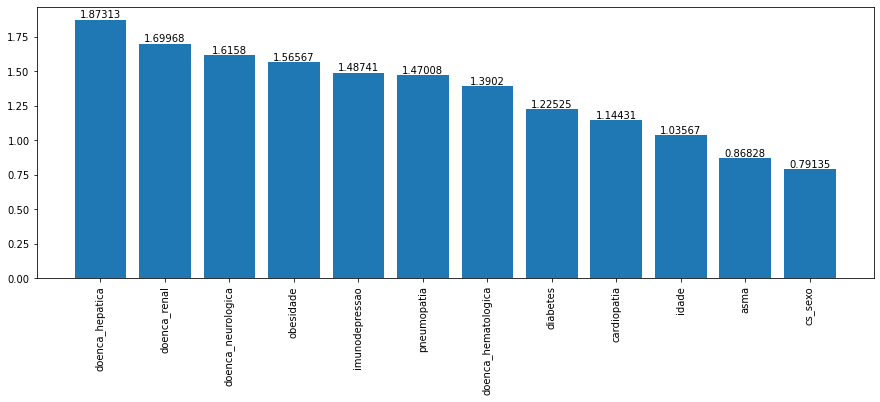

CPU times: user 276 ms, sys: 113 ms, total: 389 ms
Wall time: 273 ms


In [159]:
%%time
feature_names = ['idade', 'cs_sexo', 'asma', 'cardiopatia', 'diabetes',
       'doenca_hematologica', 'doenca_hepatica', 'doenca_neurologica',
       'doenca_renal', 'imunodepressao', 'obesidade', 'pneumopatia']
feature_importance = pd.DataFrame(feature_names, columns = ["Feature"])
feature_importance["Importância"] = pow(math.e, w)
feature_importance = feature_importance.sort_values(by = ["Importância"], ascending=False)

#ax = feature_importance.plot.barh(x='Feature', y='Importância')
fig, ax = plt.subplots(figsize=(15, 5))
bars = ax.bar(feature_importance['Feature'], feature_importance['Importância'])
ax.bar_label(bars)
ax.tick_params(axis='x', rotation=90)
plt.show()

O recurso mais forte no conjunto de dados é a doença hepática. Um aumento da feature doenca_hepatica em uma unidade aumenta as chances de ser óbito por um fator de 1,87 *quando todos os outros recursos permanecem os mesmos*.